In [1]:
# ============================================================
# 1. 📦 IMPORT REQUIRED LIBRARIES
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import (
    mean_squared_error, r2_score, accuracy_score,
    f1_score, roc_auc_score, classification_report
)
from sklearn.metrics import precision_score, recall_score, f1_score, fbeta_score, roc_auc_score, accuracy_score


In [2]:
# ============================================================
# 2. 📥 LOAD AND PREPROCESS STOCK DATA
# ============================================================

import pandas as pd

# --- 1. Data Loading ---
path_stock = "../data/stock"  # Path to the stock data file
df = pd.read_csv(f"{path_stock}/AAPL_stock.csv")  # Load the stock data into a DataFrame

# --- 2. Data Cleaning ---
df.dropna(inplace=True)  # Remove rows with missing values 
df.rename(columns={  # Rename columns for consistency
    "Price": "date",
    "Close": "close",
    "High": "high",
    "Low": "low",
    "Open": "open",
    "Volume": "volume"
}, inplace=True)
df['date'] = pd.to_datetime(df['date'])  # Convert 'date' column to datetime objects

# --- 3. Data Filtering ---
date_filter_low = '2020-01-01'  # Define the start date for filtering
date_filter_high = '2025-01-01'  # Define the start date for filtering
df = df[df['date'] >= date_filter_low]  # Filter data after the specified date
df = df[df['date'] <= date_filter_high]  # Filter data after the specified date
df.drop('Ticker', axis=1, inplace=True)  # Remove the 'Ticker' column (if present)
df.set_index('date', inplace=True)  # Set 'date' as the index

# --- 4. Data Type Conversion ---
price_cols = ['open', 'high', 'low', 'close', 'volume']  # List of price-related columns
for col in price_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, handle errors
    
# --- 5. Final Data Cleaning ---
df.dropna(subset=price_cols, inplace=True)  # Drop rows with NaN values in price columns

# BASIC EDA


--- Basic Information ---
Date Frame index: 
  DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2024-12-17', '2024-12-18', '2024-12-19', '2024-12-20',
               '2024-12-23', '2024-12-24', '2024-12-26', '2024-12-27',
               '2024-12-30', '2024-12-31'],
              dtype='datetime64[ns]', name='date', length=1258, freq=None)

--- Date Frame Info ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2020-01-02 to 2024-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   1258 non-null   float64
 1   high    1258 non-null   float64
 2   low     1258 non-null   float64
 3   open    1258 non-null   float64
 4   volume  1258 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB
None

--- Date Frame Describ

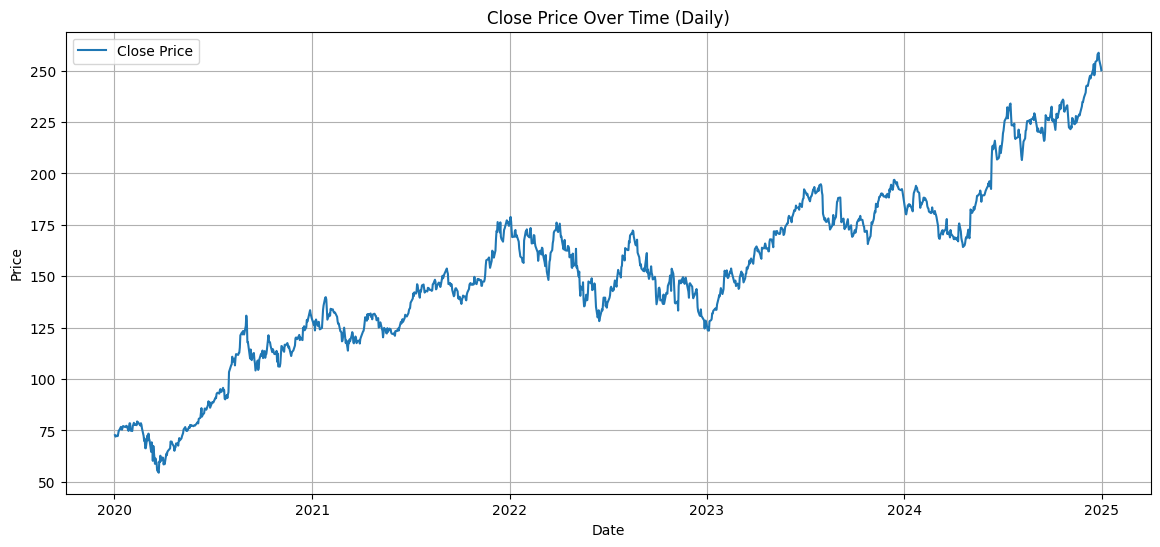

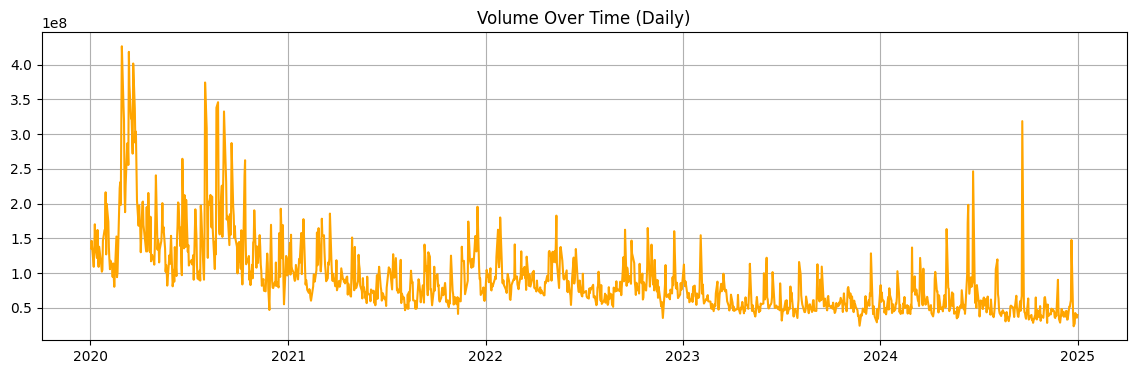

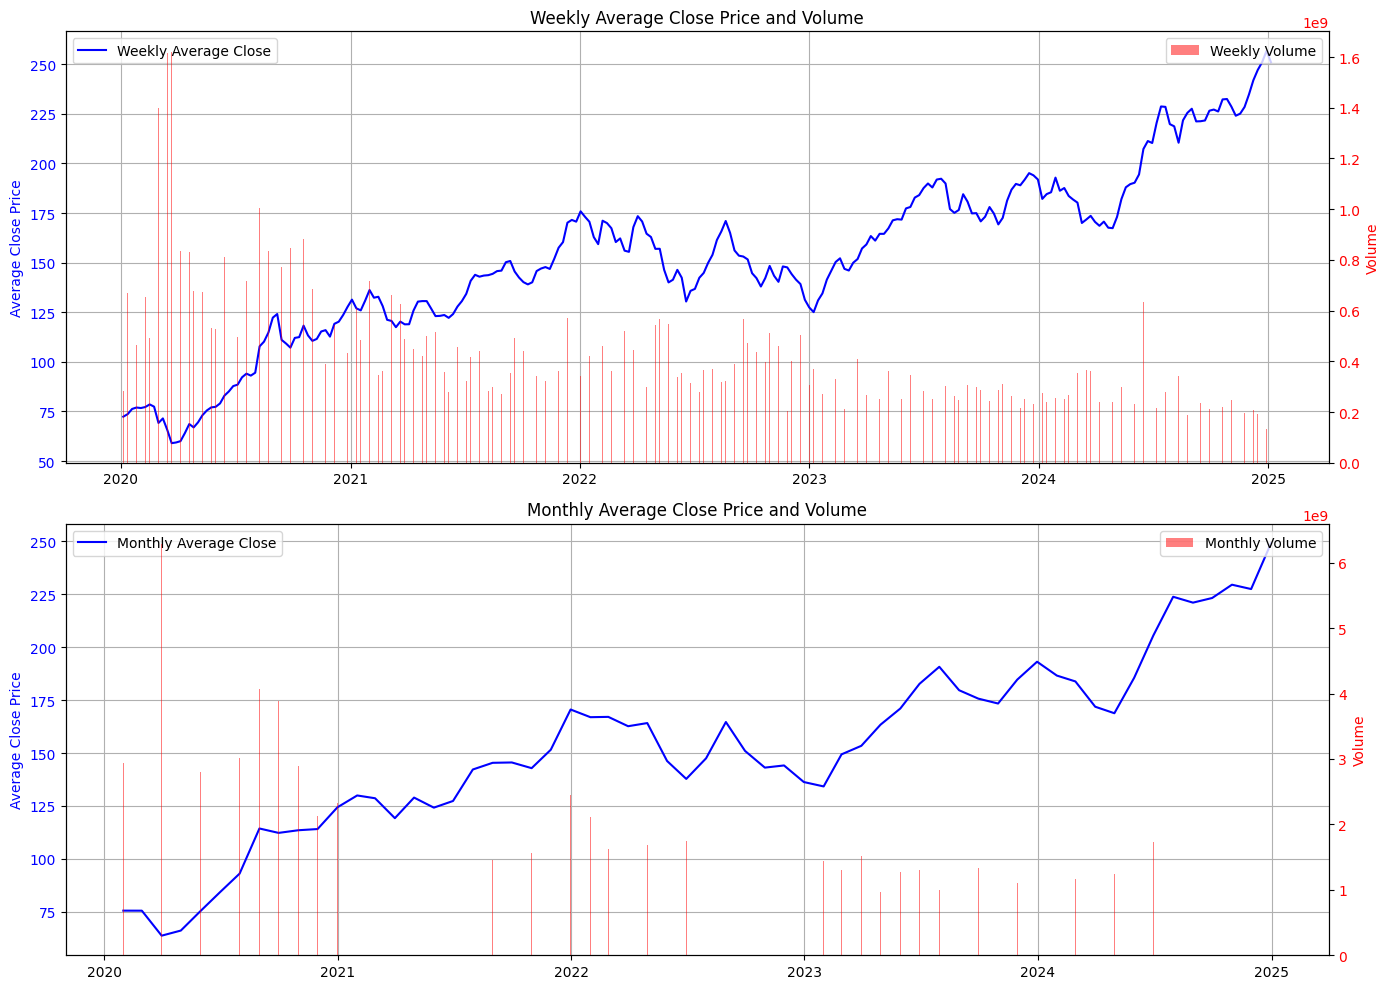

In [3]:
# ============================================================
# 3. 📈 BASIC EXPLORATORY DATA ANALYSIS (EDA)
# ============================================================

import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Basic DataFrame Information ---
print("\n--- Basic Information ---")
print("Date Frame index: \n ", df.index)
print("========" * 5)
print("\n--- Date Frame Info ---")
print(df.info())
print("========" * 5)
print("\n--- Date Frame Describe ---")
print(df.describe())

# --- 2. Daily Price and Volume Trends ---
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['close'], label='Close Price')
plt.title('Close Price Over Time (Daily)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 4))
plt.plot(df.index, df['volume'], label='Volume', color='orange')
plt.title('Volume Over Time (Daily)')
plt.grid(True)
plt.show()

# --- 3. Weekly and Monthly Aggregations with Volume ---
# Resample data to weekly, monthly, and yearly frequencies
df_weekly = df[['close', 'volume']].resample('W').agg({'close': 'mean', 'volume': 'sum'})
df_monthly = df[['close', 'volume']].resample('M').agg({'close': 'mean', 'volume': 'sum'})

# Plot weekly and monthly trends with volume
fig, axes = plt.subplots(2, 1, figsize=(14, 10))  # Create 2 subplots

# Weekly Plot
axes[0].plot(df_weekly.index, df_weekly['close'], label='Weekly Average Close', color='blue')
axes[0].set_ylabel('Average Close Price', color='blue')
axes[0].tick_params(axis='y', labelcolor='blue')
axes[0].set_title('Weekly Average Close Price and Volume')
axes[0].grid(True)

ax2 = axes[0].twinx()  # Create a secondary y-axis
ax2.bar(df_weekly.index, df_weekly['volume'], label='Weekly Volume', color='red', alpha=0.5)
ax2.set_ylabel('Volume', color='red')
ax2.tick_params(axis='y', labelcolor='red')

axes[0].legend(loc='upper left')
ax2.legend(loc='upper right')

# Monthly Plot (Similar structure to weekly plot)
axes[1].plot(df_monthly.index, df_monthly['close'], label='Monthly Average Close', color='blue')
axes[1].set_ylabel('Average Close Price', color='blue')
axes[1].tick_params(axis='y', labelcolor='blue')
axes[1].set_title('Monthly Average Close Price and Volume')
axes[1].grid(True)

ax3 = axes[1].twinx()
ax3.bar(df_monthly.index, df_monthly['volume'], label='Monthly Volume', color='red', alpha=0.5)
ax3.set_ylabel('Volume', color='red')
ax3.tick_params(axis='y', labelcolor='red')

axes[1].legend(loc='upper left')
ax3.legend(loc='upper right')

plt.tight_layout()
plt.show()

# 4. 🛠 FEATURE ENGINEERING

In [4]:
from feature_engineering import FeatureEngineering
# Initialize and run feature engineering
#fe = FeatureEngineering(df)
#features_df = fe.run()

In [5]:

# ================================================================
# 📈 4. 🛠 FEATURE ENGINEERING AND EXTRACTION (FINAL CLEAN VERSION)
# ================================================================

import numpy as np

# ---------------------------------------------
# 4.1 Price Behavior Features
# ---------------------------------------------


# ---  Basic Time Features ---
df['year'] = df.index.year
df['month_num'] = df.index.month
df['day_number_week'] = df.index.weekday  # 0=Monday
df['day_number_month'] = df.index.day
df['week_number'] = df.index.isocalendar().week
df['quarter'] = df.index.quarter


# --- Time Cyclical Features ---
df['month_sin'] = np.sin(2 * np.pi * df['month_num'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month_num'] / 12)

df['dayofweek_sin'] = np.sin(2 * np.pi * df['day_number_week'] / 7)
df['dayofweek_cos'] = np.cos(2 * np.pi * df['day_number_week'] / 7)

df['quarter_sin'] = np.sin(2 * np.pi * df['quarter'] / 4)
df['quarter_cos'] = np.cos(2 * np.pi * df['quarter'] / 4)


# Price range and averages
df['delta_price'] = df['high'] - df['low']  # Daily high-low range
df['avg_price'] = (df['close'] + df['high'] + df['low'] + df['open']) / 4  # Daily average price
df['price_ratio'] = df['delta_price'] / df['avg_price']  # Ratio of daily range to average price

df['price_ratio_5d_std'] = df['price_ratio'].rolling(window=5).std()
df['price_ratio_10d_std'] = df['price_ratio'].rolling(window=10).std()
df['price_ratio_20d_std'] = df['price_ratio'].rolling(window=20).std()
df['price_ratio_30d_std'] = df['price_ratio'].rolling(window=30).std()

# Price ratios change
df['price_ratio_change_1d'] = df['price_ratio'].pct_change().shift(-1)
df['price_ratio_change_2d'] = df['price_ratio'].pct_change().shift(-2)

# Investment metrics
df['invest'] = df['volume'] * df['avg_price']  # Volume weighted by avg price
df['invest_change_1d'] = df['invest'].pct_change().shift(-1)
df['invest_change_2d'] = df['invest'].pct_change().shift(-2)

# ---------------------------------------------
# 4.2 Return and Momentum Features
# ---------------------------------------------

# Simple returns
df['return_1d'] = df['close'].pct_change(1)
df['return_5d'] = df['close'].pct_change(5)
df['return_log_1d'] = np.log(df['close'] / df['close'].shift(1))
df['return_log_5d'] = np.log(df['close'] / df['close'].shift(5))


# --- Standard Deviation (Volatility) based on Simple Returns ---

# Volatility of daily returns over a rolling 5-day window
df['volatility_return_1d_std'] = df['return_1d'].rolling(window=5).std()

# Volatility of 5-day returns over a rolling 5-day window
df['volatility_return_5d_std'] = df['return_5d'].rolling(window=5).std()

# --- Standard Deviation based on Log Returns ---

# Volatility of daily log returns over 5 days
df['volatility_return_log_1d_std'] = df['return_log_1d'].rolling(window=5).std()

# Volatility of 5-day log returns over 5 days
df['volatility_return_log_5d_std'] = df['return_log_5d'].rolling(window=5).std()


# Cumulative and rolling returns
for window in [3, 5, 7, 14, 20, 30, 60]:
    df[f'return_cum_{window}d'] = df['return_1d'].rolling(window=window).sum()
    df[f'return_rollmean_{window}d'] = df['return_1d'].rolling(window=window).mean()

# Momentum indicators
df['momentum_1d'] = df['close'] - df['close'].shift(1)
for window in [3, 5, 7, 14, 20, 30, 60]:
    df[f'momentum_abs_{window}d'] = df['close'] - df['close'].shift(window)
    df[f'momentum_rel_{window}d'] = df['close'] / df['close'].shift(window)

# ---------------------------------------------
# 4.3 Volatility and Risk Features
# ---------------------------------------------

# Rolling volatility
for window in [3, 5, 7, 14, 20, 30, 60]:
    df[f'volatility_{window}d'] = df['return_log_1d'].rolling(window=window).std()

# Volume-weighted returns
for window in [3, 5, 7, 14, 20, 30, 60]:
    df[f'volume_weighted_return_{window}d'] = (df['return_1d'] * df['volume']).rolling(window=window).mean()

# Volatility relative to volume
for window in [3, 5, 7, 14, 20, 30, 60]:
    df[f'volatility_to_volume_{window}d'] = df[f'volatility_{window}d'] / df['volume'].rolling(window=window).mean()

# True Range and Average True Range (ATR)
df['tr'] = np.maximum(
    df['high'] - df['low'],
    np.maximum(abs(df['high'] - df['close'].shift()), abs(df['low'] - df['close'].shift()))
)

for window in [3, 5, 7, 14, 20, 25]:
    df[f'atr_{window}d'] = df['tr'].rolling(window=window).mean()

# ---------------------------------------------
# 4.4 Trend Indicators
# ---------------------------------------------

# RSI Calculation (Relative Strength Index)
def compute_rsi(series, window=14):
    delta = series.diff()
    up = delta.clip(lower=0)
    down = -delta.clip(upper=0)
    rs = up.rolling(window=window).mean() / down.rolling(window=window).mean()
    return 100 - (100 / (1 + rs))

for window in [3, 5, 7, 14]:
    df[f'rsi_{window}d'] = compute_rsi(df['close'], window=window)

# MACD and Signal Line
exp1 = df['close'].ewm(span=12, adjust=False).mean()
exp2 = df['close'].ewm(span=26, adjust=False).mean()
df['macd_line'] = exp1 - exp2
df['macd_signal'] = df['macd_line'].ewm(span=9, adjust=False).mean()

# ---------------------------------------------
# 4.5 Key Levels: Pivot Points, Supports, Resistances
# ---------------------------------------------

# Daily pivot points
df['pivot_point'] = (df['high'] + df['low'] + df['close']) / 3
df['support1'] = (2 * df['pivot_point']) - df['high']
df['resistance1'] = (2 * df['pivot_point']) - df['low']
df['support2'] = df['pivot_point'] - (df['high'] - df['low'])
df['resistance2'] = df['pivot_point'] + (df['high'] - df['low'])

# ---------------------------------------------
# 4.6 Breakout Indicators
# ---------------------------------------------

# Donchian Channels
df['donchian_high_20d'] = df['high'].rolling(window=20).max()
df['donchian_low_20d'] = df['low'].rolling(window=20).min()

# ---------------------------------------------
# 4.7 Fibonacci Levels (Retracement Zones)
# ---------------------------------------------

# Classical Fibonacci retracements
high_30d = df['high'].rolling(window=30).max()
low_30d = df['low'].rolling(window=30).min()
diff_30d = high_30d - low_30d

fib_levels = [0, 0.236, 0.382, 0.5, 0.618, 0.786, 1]
for lvl in fib_levels:
    df[f'fib_{lvl}_30d'] = high_30d - (diff_30d * lvl)

# Fibonacci zone flags
df['above_fib_0.5_30d'] = (df['close'] > df['fib_0.5_30d']).astype(int)
df['above_fib_0.618_30d'] = (df['close'] > df['fib_0.618_30d']).astype(int)
df['inside_fib_zone_0.382_0.618'] = ((df['close'] < df['fib_0.382_30d']) & (df['close'] > df['fib_0.618_30d'])).astype(int)

# ---------------------------------------------
# 4.8 Moving Averages
# ---------------------------------------------

for window in [3, 5, 7, 14, 20, 50, 200]:
    df[f'sma_{window}d'] = df['close'].rolling(window=window).mean()
    df[f'ema_{window}d'] = df['close'].ewm(span=window, adjust=False).mean()

# Bollinger Bands
for window in [14, 20]:
    sma = df['close'].rolling(window=window).mean()
    rolling_std = df['close'].rolling(window=window).std()
    df[f'bollinger_upper_{window}d'] = sma + 2 * rolling_std
    df[f'bollinger_lower_{window}d'] = sma - 2 * rolling_std

# ---------------------------------------------
# 4.9 Volume Based Indicators
# ---------------------------------------------

# VWAP (Volume Weighted Average Price)
df['vwap'] = (df['volume'] * (df['high'] + df['low'] + df['close']) / 3).cumsum() / df['volume'].cumsum()

# OBV (On Balance Volume)
df['obv'] = (np.sign(df['close'].diff()) * df['volume']).fillna(0).cumsum()

# ---------------------------------------------
# 4.10 Lag and Difference Features
# ---------------------------------------------

# Lags
for lag in [1, 2, 3, 5, 7, 14, 20, 30]:
    df[f'lag_close_{lag}d'] = df['close'].shift(lag)
    df[f'lag_return_{lag}d'] = df['close'].pct_change(lag)

# Differences
df['diff_close_1d'] = df['close'].diff(1)
df['diff_close_2d'] = df['close'].diff(2)

# ---------------------------------------------
# 4.11 Future Targets for Modeling
# ---------------------------------------------

df['target_direction_1d'] = (df['close'].shift(-1) > df['close']).astype(int)
df['target_direction_3d'] = (df['close'].shift(-3) > df['close']).astype(int)
df['target_direction_5d'] = (df['close'].shift(-5) > df['close']).astype(int)
df['target_volatility_next_3d'] = df['return_1d'].rolling(window=3).std().shift(-3)
df['target_volatility_next_5d'] = df['return_1d'].rolling(window=5).std().shift(-5)

# ---------------------------------------------
# 4.12 Golden Cross and Death Cross
# ---------------------------------------------

sma_20 = df['close'].rolling(window=20).mean()
sma_50 = df['close'].rolling(window=50).mean()
sma_200 = df['close'].rolling(window=200).mean()

df['golden_cross_signal'] = np.where((sma_50.shift(1) < sma_200.shift(1)) & (sma_50 > sma_200), 1, 0)
df['death_cross_signal'] = np.where((sma_50.shift(1) > sma_200.shift(1)) & (sma_50 < sma_200), -1, 0)

# ---------------------------------------------
# 4.13 Final Cleanup
# ---------------------------------------------

df.dropna(inplace=True)
df.to_csv("../data/aapl_stock_features_final_full.csv")
print("✅ All features engineered and saved successfully!")



✅ All features engineered and saved successfully!


/var/folders/sg/6fn_sqtx2q9b2k4xrpxrcf180000gn/T/ipykernel_89016/2832569967.py:145: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['resistance2'] = df['pivot_point'] + (df['high'] - df['low'])
/var/folders/sg/6fn_sqtx2q9b2k4xrpxrcf180000gn/T/ipykernel_89016/2832569967.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['donchian_high_20d'] = df['high'].rolling(window=20).max()
/var/folders/sg/6fn_sqtx2q9b2k4xrpxrcf180000gn/T/ipykernel_89016/2832569967.py:153: PerformanceWarning: DataFrame is highly fragmented.  This is us

# 📚 Advance EDA Interpretation Guide

## 1. Close Price and Moving Averages
- **Description:** Shows raw close price with SMA20, SMA50, and SMA200.
- **Purpose:** Helps identify long-term and short-term trends.
- **Interpretation:** 
  - SMA20 above SMA50/SMA200 → bullish signal (Golden Cross).
  - SMA20 below SMA50/SMA200 → bearish signal (Death Cross).

---

## 2. Average True Range (ATR)
- **Description:** Measures price volatility over 3, 5, 7, and 14 days.
- **Purpose:** Understand market volatility.
- **Interpretation:** 
  - High ATR → high volatility.
  - Low ATR → stable or consolidating market.

---

## 3. Relative Strength Index (RSI)
- **Description:** Tracks momentum strength (3, 5, 7, 14 days).
- **Purpose:** Detect overbought or oversold conditions.
- **Interpretation:**
  - RSI > 70 → overbought (potential drop).
  - RSI < 30 → oversold (potential rise).

---

## 4. Pivot Points, Support, and Resistance
- **Description:** Key horizontal levels based on price calculations.
- **Purpose:** Detect reversal points and support/resistance zones.
- **Interpretation:** 
  - Price near support → possible bounce.
  - Price near resistance → possible rejection.

---

## 5. Donchian Channels
- **Description:** Tracks 20-day high and low ranges.
- **Purpose:** Identify breakouts.
- **Interpretation:**
  - Break above Donchian high → bullish breakout.
  - Break below Donchian low → bearish breakout.

---

## 6. Volume and VWAP
- **Description:** Combines volume and price average (VWAP).
- **Purpose:** Confirm trend strength.
- **Interpretation:**
  - Price above VWAP → bullish bias.
  - Price below VWAP → bearish bias.

---

## 7. Future Volatility (Predicted Standard Deviation)
- **Description:** Forecasts expected volatility over 3, 5, and 7 days.
- **Purpose:** Anticipate future risk levels.
- **Interpretation:**
  - High volatility forecast → prepare for bigger moves.
  - Low volatility forecast → stable market expected.

---

## 8. Target Direction Predictions
- **Description:** Predicts whether price will rise (1) or fall (0) in next 1 or 2 days.
- **Purpose:** Model short-term market bias.
- **Interpretation:** 
  - Useful for building classification models (up/down movement).

---

# ✨ Quick Recap
- **Trend analysis:** Close Price, Moving Averages, Pivot Points.
- **Momentum analysis:** RSI.
- **Volatility/risk analysis:** ATR, Future Volatility.
- **Breakout detection:** Donchian Channels, VWAP.
- **Volume confirmation:** Volume bars + VWAP.
- **Directional prediction:** Target signals (Direction1, Direction2).



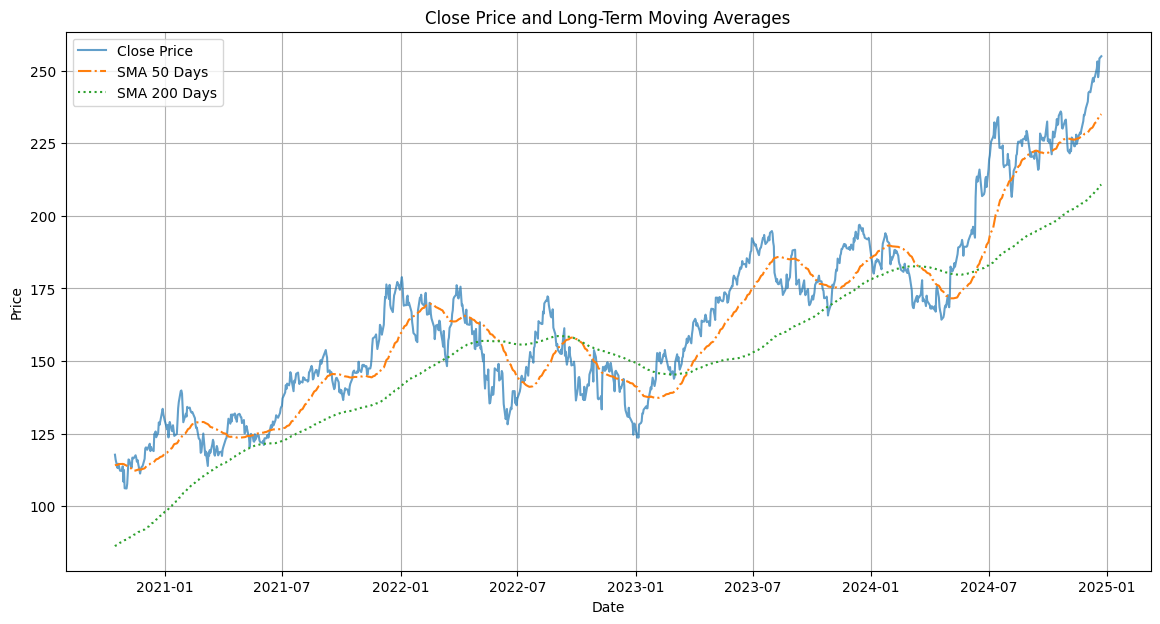

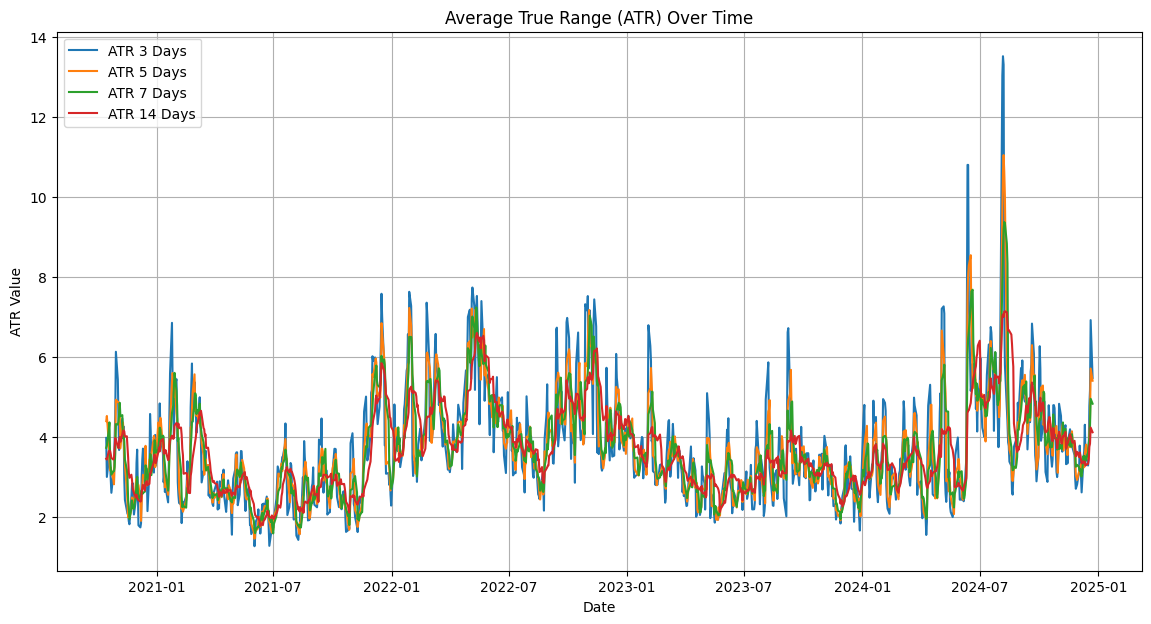

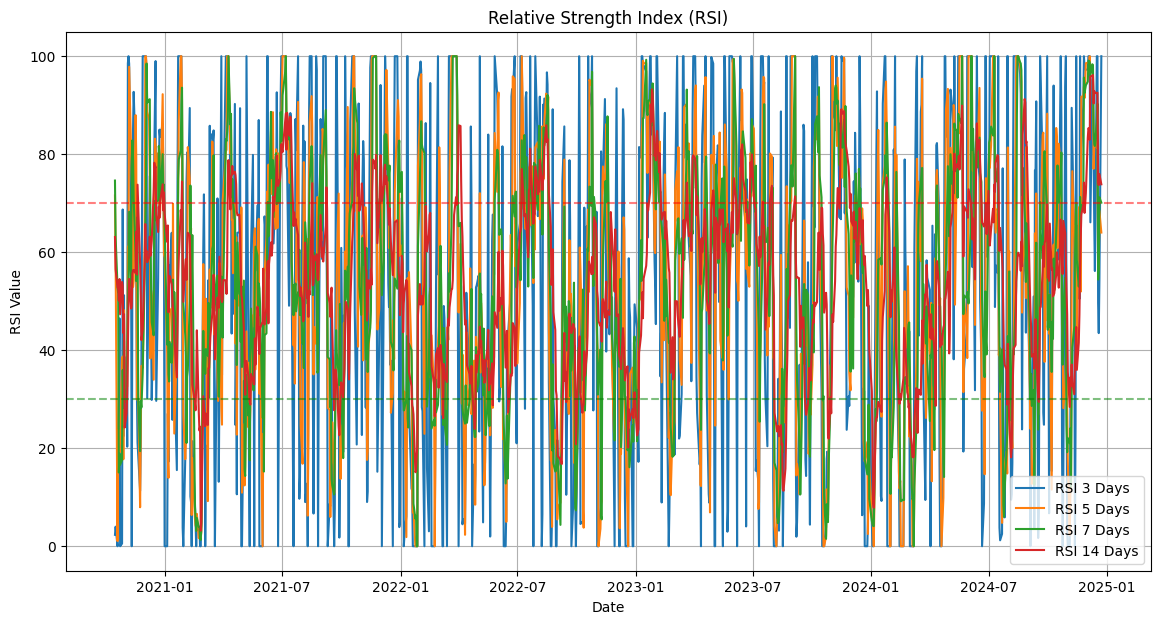

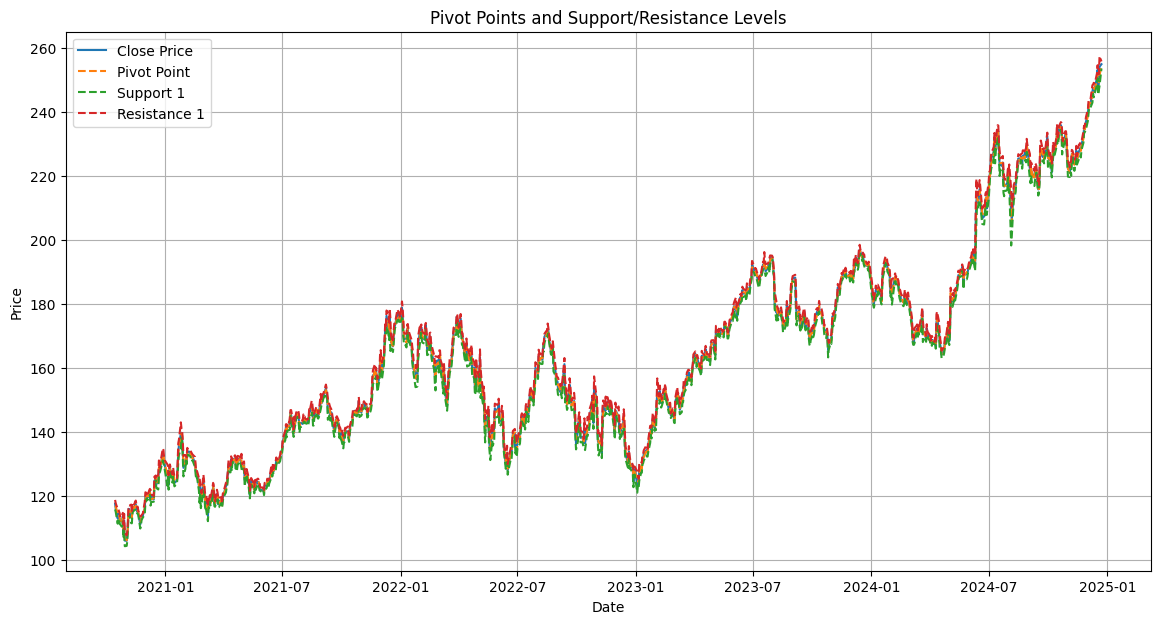

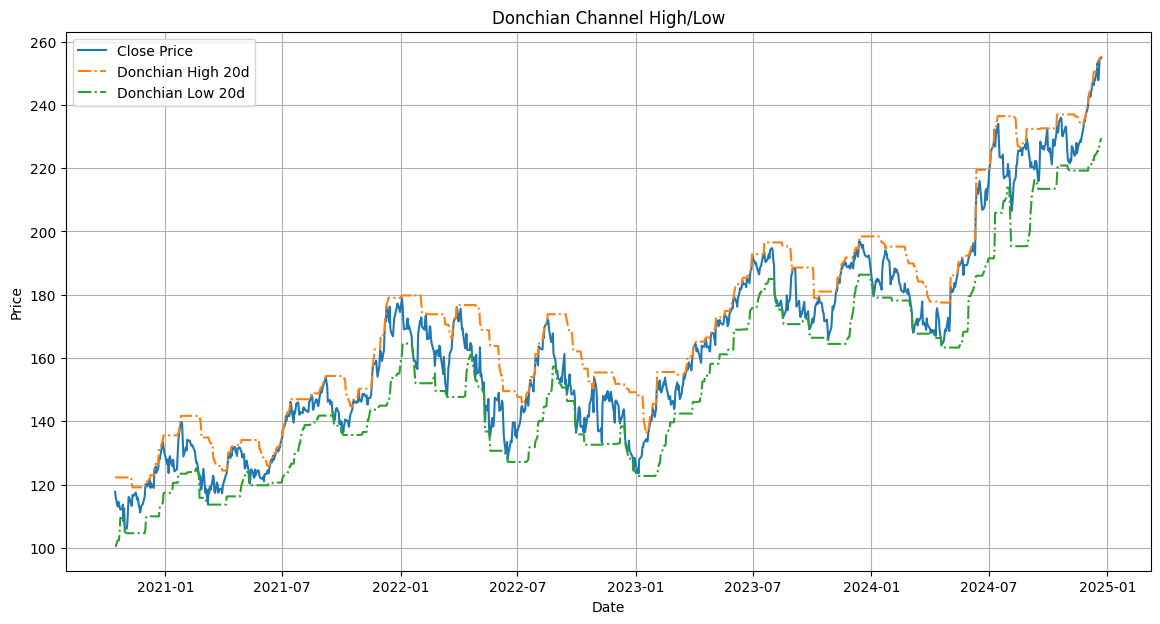

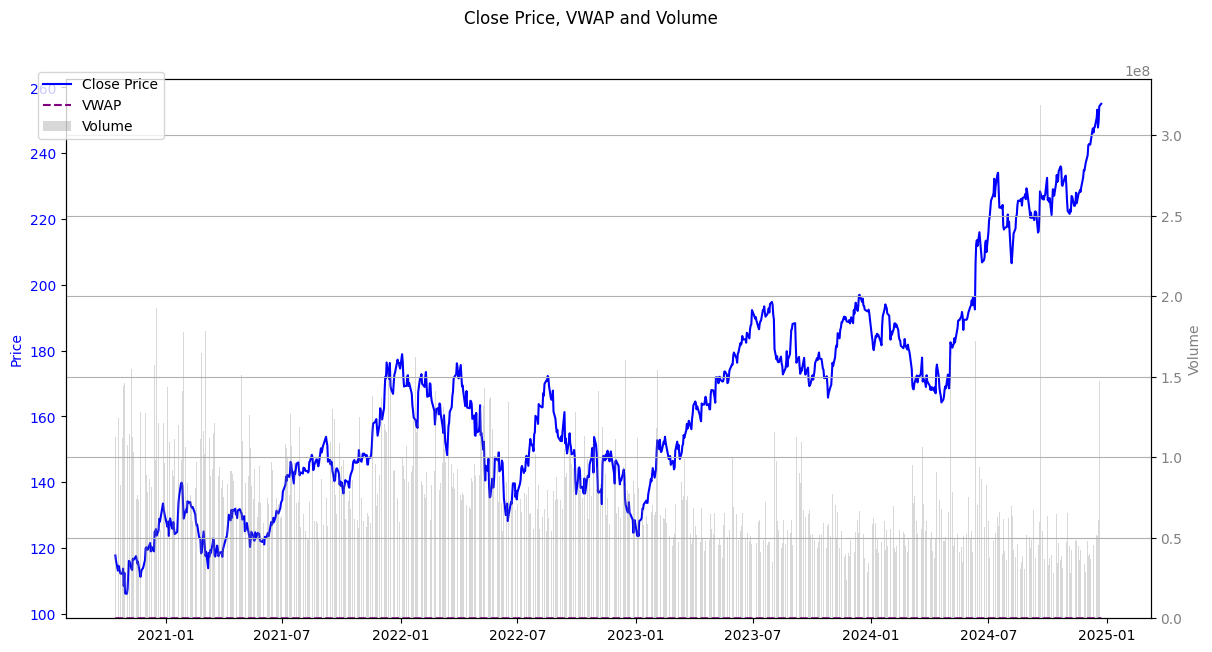

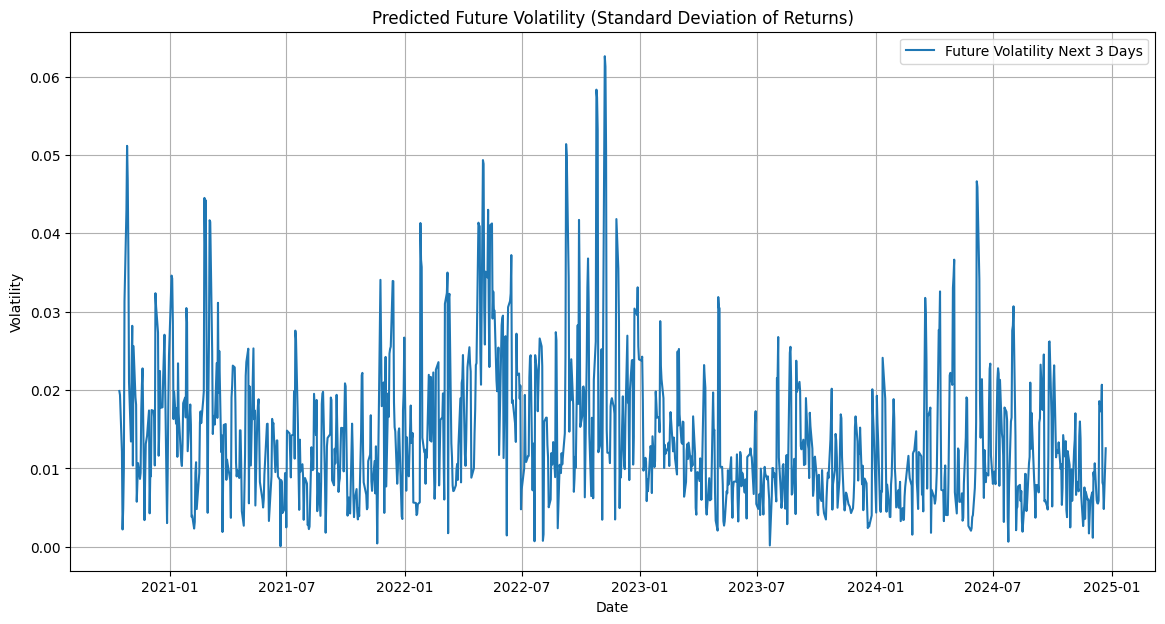

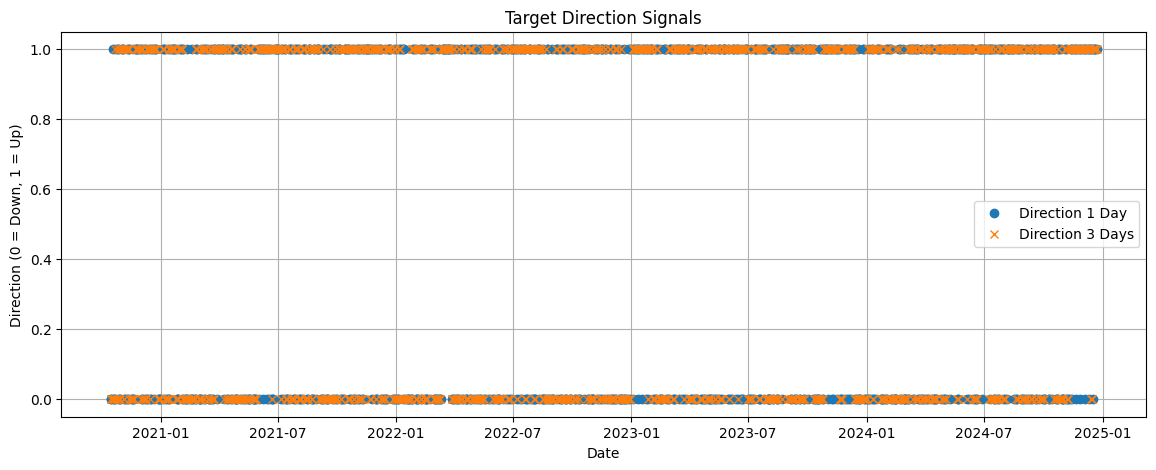

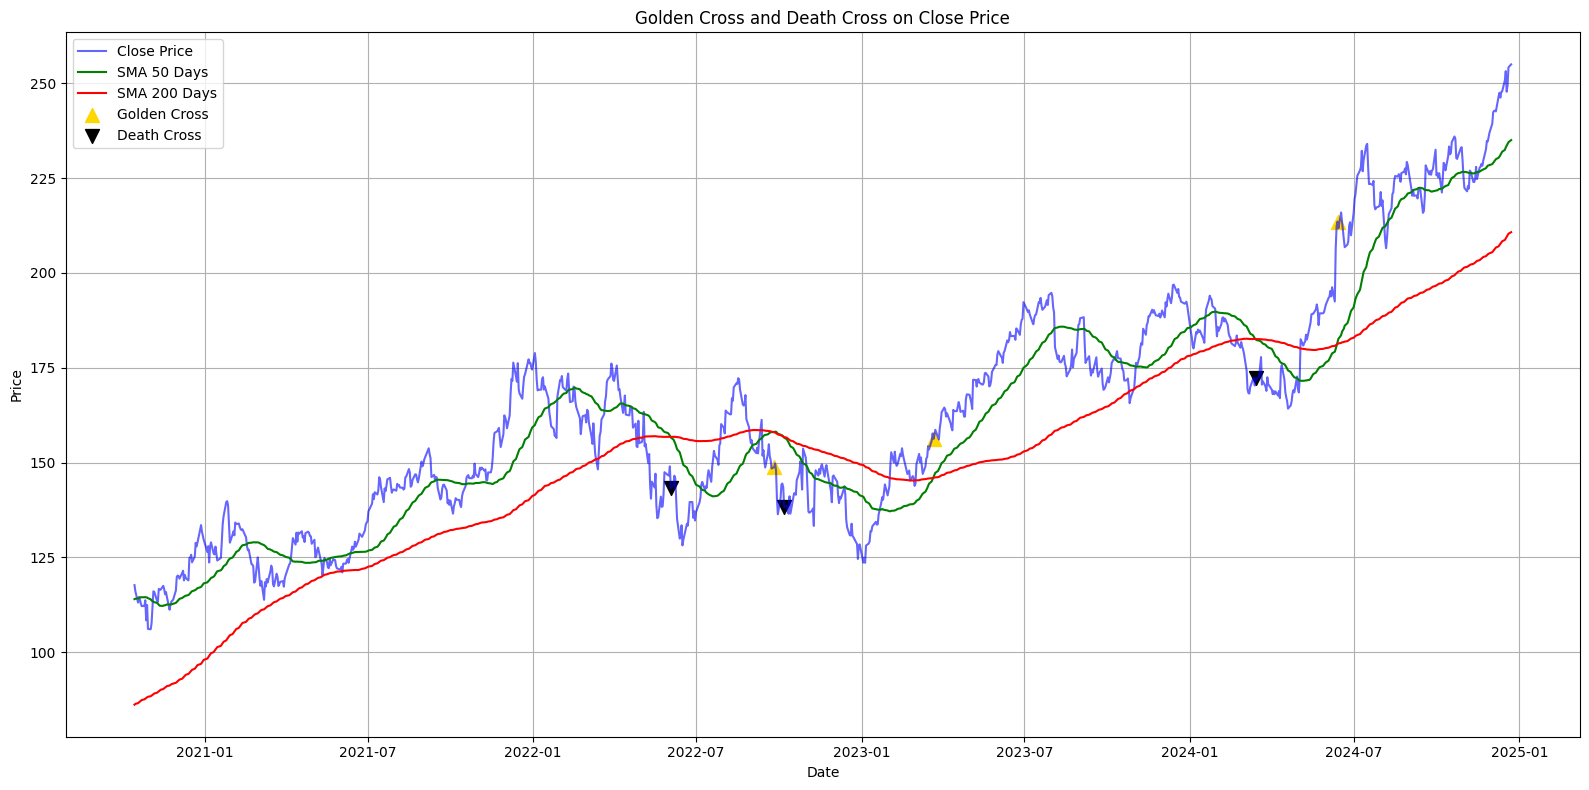

In [6]:
# ==========================================================
# 📊 5. ADVANCED EDA AFTER FINAL FEATURE ENGINEERING
# ==========================================================

import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Close Price and Moving Averages ---

plt.figure(figsize=(14,7))
plt.plot(df['close'], label='Close Price', alpha=0.7)
plt.plot(df['sma_50d'], label='SMA 50 Days', linestyle='-.')
plt.plot(df['sma_200d'], label='SMA 200 Days', linestyle=':')
plt.title('Close Price and Long-Term Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# --- 2. Average True Range (ATR) - Volatility ---

plt.figure(figsize=(14,7))
plt.plot(df['atr_3d'], label='ATR 3 Days')
plt.plot(df['atr_5d'], label='ATR 5 Days')
plt.plot(df['atr_7d'], label='ATR 7 Days')
plt.plot(df['atr_14d'], label='ATR 14 Days')
plt.title('Average True Range (ATR) Over Time')
plt.xlabel('Date')
plt.ylabel('ATR Value')
plt.legend()
plt.grid(True)
plt.show()

# --- 3. Relative Strength Index (RSI) ---

plt.figure(figsize=(14,7))
plt.plot(df['rsi_3d'], label='RSI 3 Days')
plt.plot(df['rsi_5d'], label='RSI 5 Days')
plt.plot(df['rsi_7d'], label='RSI 7 Days')
plt.plot(df['rsi_14d'], label='RSI 14 Days')
plt.axhline(70, color='red', linestyle='--', alpha=0.5)
plt.axhline(30, color='green', linestyle='--', alpha=0.5)
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI Value')
plt.legend()
plt.grid(True)
plt.show()

# --- 4. Pivot Points, Supports, Resistances ---

plt.figure(figsize=(14,7))
plt.plot(df['close'], label='Close Price')
plt.plot(df['pivot_point'], label='Pivot Point', linestyle='--')
plt.plot(df['support1'], label='Support 1', linestyle='--')
plt.plot(df['resistance1'], label='Resistance 1', linestyle='--')
plt.title('Pivot Points and Support/Resistance Levels')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# --- 5. Donchian Channels ---

plt.figure(figsize=(14,7))
plt.plot(df['close'], label='Close Price')
plt.plot(df['donchian_high_20d'], label='Donchian High 20d', linestyle='-.')
plt.plot(df['donchian_low_20d'], label='Donchian Low 20d', linestyle='-.')
plt.title('Donchian Channel High/Low')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# --- 6. Volume and VWAP ---

fig, ax1 = plt.subplots(figsize=(14,7))

ax1.plot(df['close'], color='blue', label='Close Price')
ax1.set_ylabel('Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(df['vwap'], color='purple', label='VWAP', linestyle='--')
ax2.bar(df.index, df['volume'], alpha=0.3, color='grey', label='Volume')
ax2.set_ylabel('Volume', color='grey')
ax2.tick_params(axis='y', labelcolor='grey')

fig.suptitle('Close Price, VWAP and Volume')
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))
plt.grid(True)
plt.show()


# --- 7. Predicted Future Volatility (Standard Deviation of Returns) ---
plt.figure(figsize=(14,7))
plt.plot(df['target_volatility_next_3d'], label='Future Volatility Next 3 Days')
plt.title('Predicted Future Volatility (Standard Deviation of Returns)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()


# --- 8. Direction Prediction Signals ---

plt.figure(figsize=(14,5))
plt.plot(df['target_direction_1d'], label='Direction 1 Day', marker='o', linestyle='')
plt.plot(df['target_direction_3d'], label='Direction 3 Days', marker='x', linestyle='')
plt.title('Target Direction Signals')
plt.xlabel('Date')
plt.ylabel('Direction (0 = Down, 1 = Up)')
plt.legend()
plt.grid(True)
plt.show()

# --- 9. Golden Cross and Death Cross Events ---

plt.figure(figsize=(16,8))

# Plot close price
plt.plot(df.index, df['close'], label='Close Price', color='blue', alpha=0.6)

# Plot SMA 50 and SMA 200
plt.plot(df.index, df['sma_50d'], label='SMA 50 Days', color='green', linewidth=1.5)
plt.plot(df.index, df['sma_200d'], label='SMA 200 Days', color='red', linewidth=1.5)

# Highlight Golden Crosses
golden_crosses = df[df['golden_cross_signal'] == 1]
plt.scatter(golden_crosses.index, df.loc[golden_crosses.index, 'close'], marker='^', color='gold', s=100, label='Golden Cross')

# Highlight Death Crosses
death_crosses = df[df['death_cross_signal'] == -1]
plt.scatter(death_crosses.index, df.loc[death_crosses.index, 'close'], marker='v', color='black', s=100, label='Death Cross')

plt.title('Golden Cross and Death Cross on Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Correlation Analysis and Clean Target Table

/Users/payamoghtanem/bootcamp/capstone-SignalSigma/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


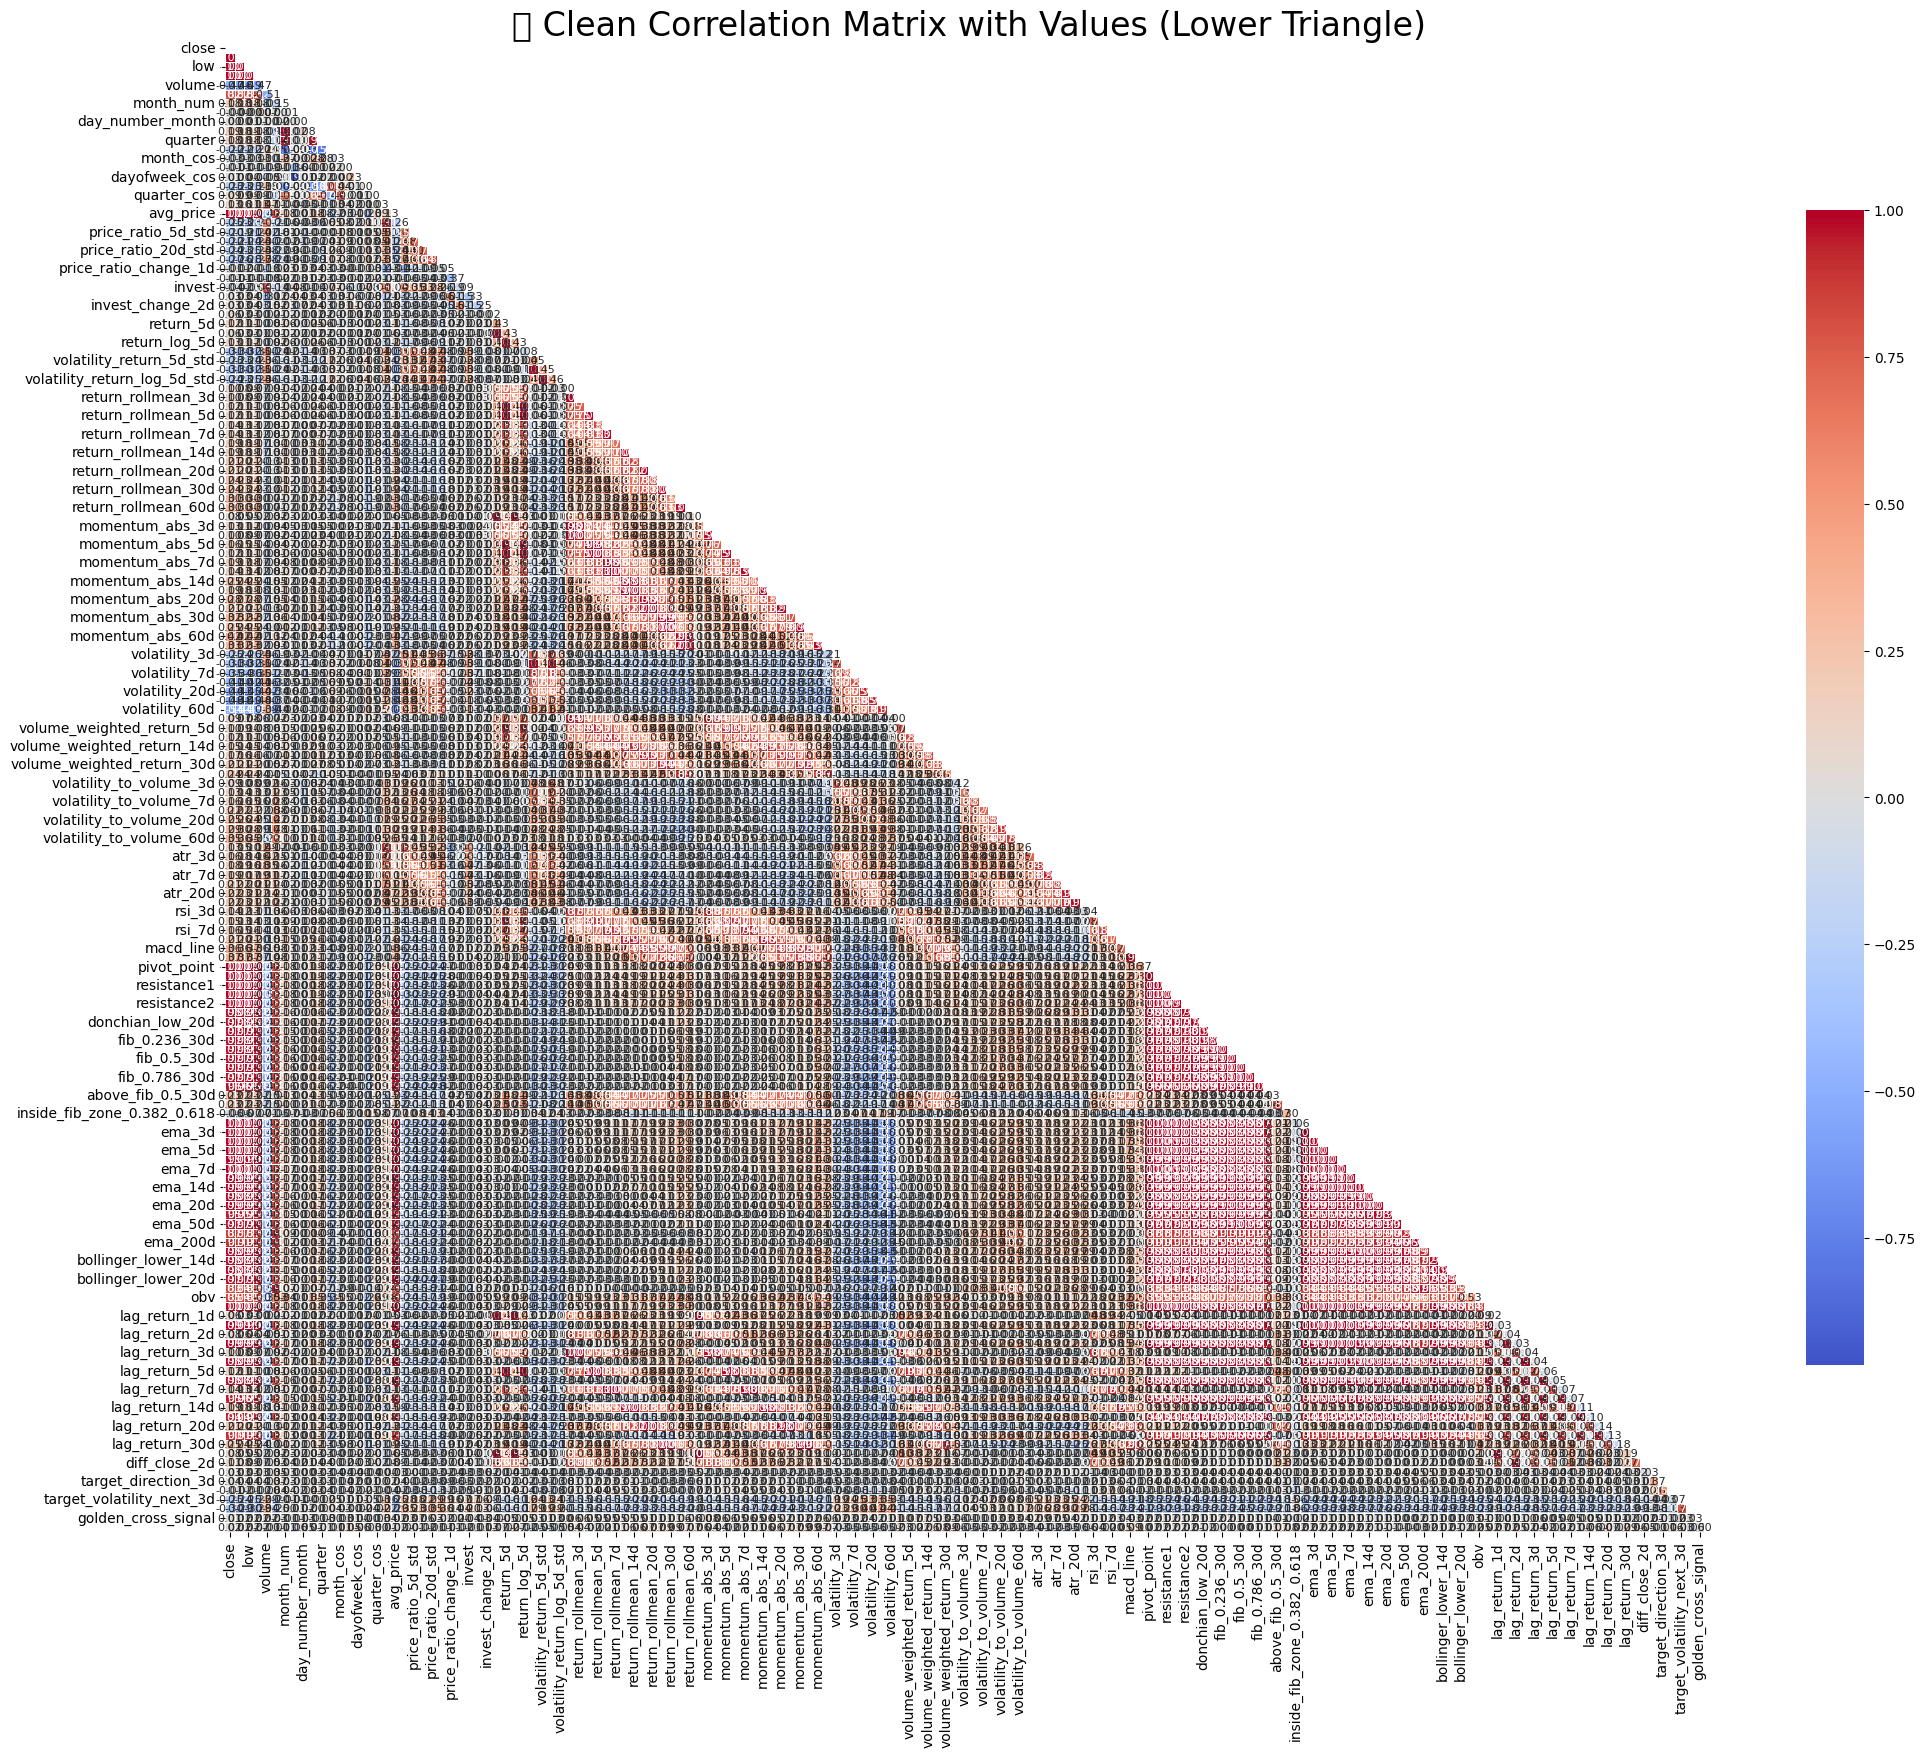

In [7]:
# ==========================================================
# 7. 📈 Safe Correlation Analysis and Clean Target Table (Annotated Version)
# ==========================================================

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --- 7.1 Safe Copy ---
df_copy = df.copy(deep=True).reset_index(drop=True)

# --- 7.2 Temporary Corr Matrix ---
corr_matrix_temp = df_copy.corr()

# --- 7.3 Filter out Features where correlation with 'close' is NaN ---

# Focus only on features where correlation with 'close' exists
valid_features = corr_matrix_temp['close'].dropna().index.tolist()

# Now build cleaned correlation matrix based on valid features only
corr_matrix_clean = df_copy[valid_features].corr()

# --- 7.4 Plot the Clean Correlation Matrix with Annotated Values ---

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix_clean, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(24, 20))

# Draw the heatmap
sns.heatmap(
    corr_matrix_clean,
    mask=mask,
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    annot=True,               # <== ✅ Add numbers inside the squares
    fmt=".2f",                 # <== 2 decimal points
    annot_kws={"size": 8},
    cbar_kws={"shrink": 0.75}
)

plt.title('🔗 Clean Correlation Matrix with Values (Lower Triangle)', fontsize=24)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

# --- 7.5 Correlation Table for 'close' (Cleaned) ---

# Focus only on correlation with 'close' (drop close itself)
target_corr = corr_matrix_clean['close'].drop('close').sort_values(ascending=False)

# Build a pretty table
target_corr_table = target_corr.reset_index()
target_corr_table.columns = ['Feature', 'Correlation_with_Close']



# Smart Feature Selector Based on Correlation

In [8]:
# ==========================================================
# 8. 🛠️ Smart Feature Selector Based on Correlation
# ==========================================================

def smart_feature_selector(df, target_col='close', threshold=0.001):
    """
    Selects the best features based on their correlation with the target column.

    Parameters:
    ----------
    df : pd.DataFrame
        Full feature DataFrame (must be numeric).
    target_col : str
        Name of the target column (default 'close').
    threshold : float
        Minimum absolute correlation required to keep the feature.

    Returns:
    -------
    selected_features : list
        List of feature names selected.
    selected_corr_table : pd.DataFrame
        Pretty table of feature names and their correlation values.
    """

    import pandas as pd

    # Step 1: Safe copy
    df_copy = df.copy(deep=True).reset_index(drop=True)

    # Step 2: Calculate initial correlation matrix
    corr_matrix = df_copy.corr()

    # Step 3: Filter only valid features (correlated to target, no NaN)
    valid_features = corr_matrix[target_col].dropna().index.tolist()

    # Step 4: Clean correlation matrix
    corr_matrix_clean = df_copy[valid_features].corr()

    # Step 5: Target correlation
    target_corr = corr_matrix_clean[target_col].drop(target_col)

    # Step 6: Select features with absolute correlation above threshold
    selected = target_corr[abs(target_corr) > threshold]

    selected_features = selected.index.tolist()

    # Step 7: Pretty correlation table
    selected_corr_table = selected.reset_index()
    selected_corr_table.columns = ['Feature', f'Correlation_with_{target_col}']
    selected_corr_table = selected_corr_table.sort_values(by=f'Correlation_with_{target_col}', ascending=False)

    return selected_features, selected_corr_table

# ==========================================================
# ✅ Usage Example
# ==========================================================

# Call the smart selector on your df
selected_features, selected_corr_table = smart_feature_selector(df, target_col='close', threshold=0.2)

# Show selected features
print("\nSelected Features based on Correlation Threshold:")
for feature in selected_features:
    print(f"- {feature}")




Selected Features based on Correlation Threshold:
- high
- low
- open
- volume
- year
- month_sin
- quarter_sin
- avg_price
- price_ratio
- price_ratio_10d_std
- price_ratio_20d_std
- price_ratio_30d_std
- volatility_return_1d_std
- volatility_return_5d_std
- volatility_return_log_1d_std
- volatility_return_log_5d_std
- return_cum_20d
- return_rollmean_20d
- return_cum_30d
- return_rollmean_30d
- return_cum_60d
- return_rollmean_60d
- momentum_abs_14d
- momentum_abs_20d
- momentum_rel_20d
- momentum_abs_30d
- momentum_rel_30d
- momentum_abs_60d
- momentum_rel_60d
- volatility_3d
- volatility_5d
- volatility_7d
- volatility_14d
- volatility_20d
- volatility_30d
- volatility_60d
- volume_weighted_return_30d
- volume_weighted_return_60d
- volatility_to_volume_14d
- volatility_to_volume_20d
- volatility_to_volume_30d
- volatility_to_volume_60d
- atr_14d
- atr_20d
- atr_25d
- rsi_14d
- macd_line
- macd_signal
- pivot_point
- support1
- resistance1
- support2
- resistance2
- donchian_high_2

# 6. 🧹 DATA PREPARATION FOR ML

In [9]:
# ==========================================================
# 6. 🧹 DATA PREPARATION FOR ML (Including Given Feature Set)
# ==========================================================

from sklearn.preprocessing import StandardScaler

# --- 6.3 Ensure DataFrame is sorted by date ---
df = df.sort_index()

# --- 6.4 Define Explicit Feature Columns and Target (Updated) ---

# Explicit feature columns selected
features = selected_features

# Target variable
target = 'close'

# --- 6.5 Create Feature Matrix (X) and Target Vector (y) ---

X = df[features]  # Only use the selected feature columns
y = df[target]    # Predict the close price

# --- 6.6 Split into Train and Test Sets based on Time Order (No Shuffle) ---

# Number of last days to use for testing
n_test_days = 10

# Split manually based on time
X_train = X.iloc[:-n_test_days]    # Train on all data except last 5 days
X_test = X.iloc[-n_test_days:]     # Test on last 5 days
y_train = y.iloc[:-n_test_days]
y_test = y.iloc[-n_test_days:]

# --- 6.7 Feature Scaling ---

# Initialize scaler
scaler = StandardScaler()

# Fit the scaler on training data and transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 6.8 Print Dataset Shapes to Confirm ---

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (1044, 96)
X_test shape: (10, 96)
y_train shape: (1044,)
y_test shape: (10,)


# 7. 🤖 MODEL TRAINING

**Cell Purpose**

This cell implements a small ensemble of Random Forest models—three regressors and one classifier—to illustrate how we can tackle different prediction tasks on our engineered stock‐market features:

1. **RandomForestRegressor for Close Price**  
   - **What**: Learns the mapping from scaled input features (momentum, volatility, seasonality, etc.) to the actual next‐day closing price.  
   - **Why**: Accurate price forecasts enable better position sizing, P&L estimation and can feed into portfolio optimization.

2. **RandomForestRegressor for Daily Range (High – Low)**  
   - **What**: Predicts the magnitude of the day’s intraday swing.  
   - **Why**: Anticipating range size helps set realistic stop-loss/take-profit levels and gauge intraday risk and liquidity.

3. **RandomForestRegressor for 5-Day Volatility**  
   - **What**: Forecasts the standard deviation of returns over the next five trading days.  
   - **Why**: Volatility forecasts drive risk management, option pricing inputs, and position sizing under Value-at-Risk frameworks.

4. **RandomForestClassifier for Direction (Up/Down)**  
   - **What**: Classifies whether the price will close higher or lower the next day, outputting both binary labels and class probabilities.  
   - **Why**: Directional signals support trade-signal generation. Probabilities feed into threshold‐based entry/exit criteria or portfolio weighting.

---

**Evaluation Strategy**

- **Training vs. Test Split**: Models are fit on the scaled training set and then evaluated on the unseen test set to reveal any overfitting.  
- **Regression Metrics**  
  - *MSE / MAE / R²* on training set to assess in-sample fit and bias–variance tradeoff.  
- **Classification Metrics**  
  - *Accuracy, Precision, Recall, F1, ROC-AUC* on the test set to measure real-world directional performance.  
- **Confusion Matrix Heatmap**  
  - Visualizes true vs. predicted classes, highlighting types of classification errors (false positives vs. false negatives) and informing threshold tuning.

By comparing in-sample and out-of-sample results across these tasks, you get a holistic view of model generalization, risk‐return trade-offs, and where further feature or hyperparameter refinement is needed.  


In [10]:
# ==========================================================
# 7. 🤖 Updated Full ML Modeling: Train vs Test Evaluation
# ==========================================================

# 7.0 Imports
# ----------------------------------------------------------
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier  # Models for regression & classification
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    explained_variance_score, max_error, mean_squared_log_error, mean_absolute_percentage_error,
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, log_loss, confusion_matrix
)
import matplotlib.pyplot as plt  # Plotting library for visual evaluation
import seaborn as sns           # Statistical data visualization
import pandas as pd             # Data handling
import numpy as np              # Numerical operations

# ==========================================================
# 7.1 Regression Models
# ----------------------------------------------------------
# (1) Predict Close Price
# ----------------------------------------------------------
# Initialize random forest regressor for closing price prediction
model_close = RandomForestRegressor(n_estimators=100, random_state=42)

# Train model on scaled training features and target y_train
model_close.fit(X_train_scaled, y_train)

# Generate predictions on training set for diagnostic evaluation
y_pred_close_train = model_close.predict(X_train_scaled)
# Generate predictions on test set for out-of-sample performance
y_pred_close_test = model_close.predict(X_test_scaled)

# (2) Predict Price Range (high - low)
# ----------------------------------------------------------
# Derive range target for training and testing from original DataFrame
y_range_train = (df['high'] - df['low']).iloc[:-n_test_days]  # All but last n days
y_range_test  = (df['high'] - df['low']).iloc[-n_test_days:]   # Last n days

# Initialize regressor for daily price range prediction
model_range = RandomForestRegressor(n_estimators=100, random_state=42)

# Train on training portion of range target\ n
model_range.fit(X_train_scaled, y_range_train)

# Predict on train and test splits
y_pred_range_train = model_range.predict(X_train_scaled)
y_pred_range_test  = model_range.predict(X_test_scaled)


# (3) Predict Volatility
# ----------------------------------------------------------
# Targets for next-5-day volatility from engineered features
y_volatility_train = df['target_volatility_next_5d'].iloc[:-n_test_days]
y_volatility_test  = df['target_volatility_next_5d'].iloc[-n_test_days:]

# Initialize random forest regressor for volatility
model_volatility = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit model on training volatility\ n
model_volatility.fit(X_train_scaled, y_volatility_train)

# Generate volatility predictions
y_pred_volatility_train = model_volatility.predict(X_train_scaled)
y_pred_volatility_test  = model_volatility.predict(X_test_scaled)

# ==========================================================
# 7.2 Classification Model
# ----------------------------------------------------------
# (4) Predict Direction
# ----------------------------------------------------------
# Define binary direction target for training and testing
y_direction_train = df['target_direction_1d'].iloc[:-n_test_days]
y_direction_test  = df['target_direction_1d'].iloc[-n_test_days:]

# Initialize random forest classifier for direction
model_direction = RandomForestClassifier(n_estimators=100, random_state=42)
# Train classifier on training data
model_direction.fit(X_train_scaled, y_direction_train)

# Predict class labels and probabilities on training set
y_pred_direction_train        = model_direction.predict(X_train_scaled)        # Label predictions
y_pred_direction_proba_train  = model_direction.predict_proba(X_train_scaled)[:, 1]  # Probability of class=1

# Predict labels and probabilities on test set for evaluation
y_pred_direction_test         = model_direction.predict(X_test_scaled)
y_pred_direction_proba_test   = model_direction.predict_proba(X_test_scaled)[:, 1]


# Evaluation Metrics calculation

### 7.3 Evaluation Metrics Explained

After fitting each model, we gather:

| Metric         | Definition                                        | Ideal Value                              | Interpretation                          |
| -------------- | ------------------------------------------------- | ---------------------------------------- | --------------------------------------- |
| **RMSE**       | √(mean squared error) – average error magnitude    | **Lower** (0 = perfect)                  | How far predictions stray from true values on average. |
| **R²**         | Proportion of variance explained                   | **Closer to 1** (negative = worse than constant) | Fraction of variability captured by the model. |
| **Accuracy**   | (TP + TN) / total                                   | **Higher** (1 = perfect)                 | Overall rate of correct direction calls. |
| **Precision**  | TP / (TP + FP)                                      | **Higher**                                | When model predicts “up,” how often it’s right. |
| **Recall**     | TP / (TP + FN)                                      | **Higher**                                | Of all actual “up” days, how many were caught. |
| **F1 Score**   | 2·(Precision·Recall)/(Precision+Recall)             | **Higher**                                | Balance between precision and recall.    |
| **F2 Score**   | (1+2²)·(P·R)/(4·P+R)                                | **Higher**                                | Weights recall more heavily than precision. |
| **ROC-AUC**    | Area under ROC curve                                | **Closer to 1** (0.5 = random)            | Ability to rank “up” vs. “down” days.    |

**Good vs. Bad**  
- **Good**: low RMSE, high R² on **test** set; high Accuracy/Precision/Recall/F1/AUC on **test**.  
- **Bad**: high RMSE, low R² on test; poor classification metrics on test.

**Overfitting vs. Underfitting**  
- **Overfitting**:  
  - Train metrics much better than test (e.g. RMSE_train ≪ RMSE_test, R²_train ≫ R²_test, Accuracy_train ≫ Accuracy_test).  
  - Model learned noise, won’t generalize well.  
- **Underfitting**:  
  - Both train and test metrics are poor (e.g. high RMSE, low R², low Accuracy/F1/AUC).  
  - Model too simple, missing key patterns.

Aim for good absolute scores **and** a small gap between train and test to ensure robust, generalizable performance.```


In [11]:
# ==========================================================
# 7.3 Evaluation Metrics (Corrected Version)
# ==========================================================

# Create separate dictionaries for each model
model_results = []

# --- Close Price Regression ---
results_close = {}
results_close['model'] = 'model_close - RandomForestRegressor'
results_close['close_rmse_train'] = np.sqrt(mean_squared_error(y_train, y_pred_close_train))
results_close['close_rmse_test'] = np.sqrt(mean_squared_error(y_test, y_pred_close_test))
results_close['close_r2_train'] = r2_score(y_train, y_pred_close_train)
results_close['close_r2_test'] = r2_score(y_test, y_pred_close_test)
model_results.append(results_close)

# --- Price Range Regression ---
results_range = {}
results_range['model'] = 'model_range - RandomForestRegressor'
results_range['range_rmse_train'] = np.sqrt(mean_squared_error(y_range_train, y_pred_range_train))
results_range['range_rmse_test'] = np.sqrt(mean_squared_error(y_range_test, y_pred_range_test))
results_range['range_r2_train'] = r2_score(y_range_train, y_pred_range_train)
results_range['range_r2_test'] = r2_score(y_range_test, y_pred_range_test)
model_results.append(results_range)

# --- Volatility Regression ---
results_volatility = {}
results_volatility['model'] = 'model_volatility - RandomForestRegressor'
results_volatility['volatility_rmse_train'] = np.sqrt(mean_squared_error(y_volatility_train, y_pred_volatility_train))
results_volatility['volatility_rmse_test'] = np.sqrt(mean_squared_error(y_volatility_test, y_pred_volatility_test))
results_volatility['volatility_r2_train'] = r2_score(y_volatility_train, y_pred_volatility_train)
results_volatility['volatility_r2_test'] = r2_score(y_volatility_test, y_pred_volatility_test)
model_results.append(results_volatility)

# --- Direction Classification ---
results_direction = {}
results_direction['model'] = 'model_direction - RandomForestClassifier'
results_direction['direction_accuracy_train'] = accuracy_score(y_direction_train, y_pred_direction_train)
results_direction['direction_f1_train'] = f1_score(y_direction_train, y_pred_direction_train)
results_direction['direction_auc_train'] = roc_auc_score(y_direction_train, y_pred_direction_proba_train)
results_direction['direction_precision_train'] = precision_score(y_direction_train, y_pred_direction_train)
results_direction['direction_recall_train'] = recall_score(y_direction_train, y_pred_direction_train)
results_direction['direction_f2_train'] = fbeta_score(y_direction_train, y_pred_direction_train, beta=2)

results_direction['direction_accuracy_test'] = accuracy_score(y_direction_test, y_pred_direction_test)
results_direction['direction_f1_test'] = f1_score(y_direction_test, y_pred_direction_test)
results_direction['direction_auc_test'] = roc_auc_score(y_direction_test, y_pred_direction_proba_test)
results_direction['direction_precision_test'] = precision_score(y_direction_test, y_pred_direction_test)
results_direction['direction_recall_test'] = recall_score(y_direction_test, y_pred_direction_test)
results_direction['direction_f2_test'] = fbeta_score(y_direction_test, y_pred_direction_test, beta=2)
model_results.append(results_direction)

# Convert to DataFrame for easy view
results_df = pd.DataFrame(model_results)


# Plots for Deep Interpretation

## 📋 Full Evaluation Summary: Interpreting Model Results

In this section, we evaluate all trained models based on **both Regression** and **Classification** metrics across **Train** and **Test** sets.

### 🧠 How the Code Works:

- We first **convert all model results** (stored as dictionaries) into a **single DataFrame**.
- We **split** the metric names into:
  - **Target** (e.g., close price, range, volatility, direction)
  - **Metric Type** (e.g., RMSE, R2, Accuracy, Precision, F1, F2, AUC)
  - **Set** (train or test)
- We **pivot** the data for clean tabular visualization.
- Finally, we **plot bar charts** to easily compare how each model performed on different metrics across training and testing.

### 📈 How to Interpret the Metrics:

#### Regression Models (Price, Range, Volatility):
- **RMSE (Root Mean Squared Error)**:  
  ➔ Lower is better. Measures prediction error in original units.
- **R2 Score (Coefficient of Determination)**:  
  ➔ Closer to 1 means better fit. Shows % of variance explained by the model.

#### Classification Model (Direction: Up/Down):
- **Accuracy**:  
  ➔ % of correctly predicted up/down directions.
- **Precision**:  
  ➔ Out of predicted "ups," how many were actually up.
- **Recall**:  
  ➔ Out of actual "ups," how many were correctly caught.
- **F1 Score**:  
  ➔ Balance between Precision and Recall.
- **F2 Score**:  
  ➔ Similar to F1 but puts even more weight on Recall (catching true positives).
- **ROC-AUC Score**:  
  ➔ Measures model's ability to distinguish between up/down overall (0.5 = random, 1.0 = perfect).

### ⚡ Key Insights:

- **Compare Train vs Test**:  
  ➔ If Train is much better than Test → possible **overfitting**.
- **Watch R2 and RMSE Together**:  
  ➔ High R2 + Low RMSE = Strong model.
- **Classification:**  
  ➔ High F1, F2, and AUC are signs of good classification balance.

---

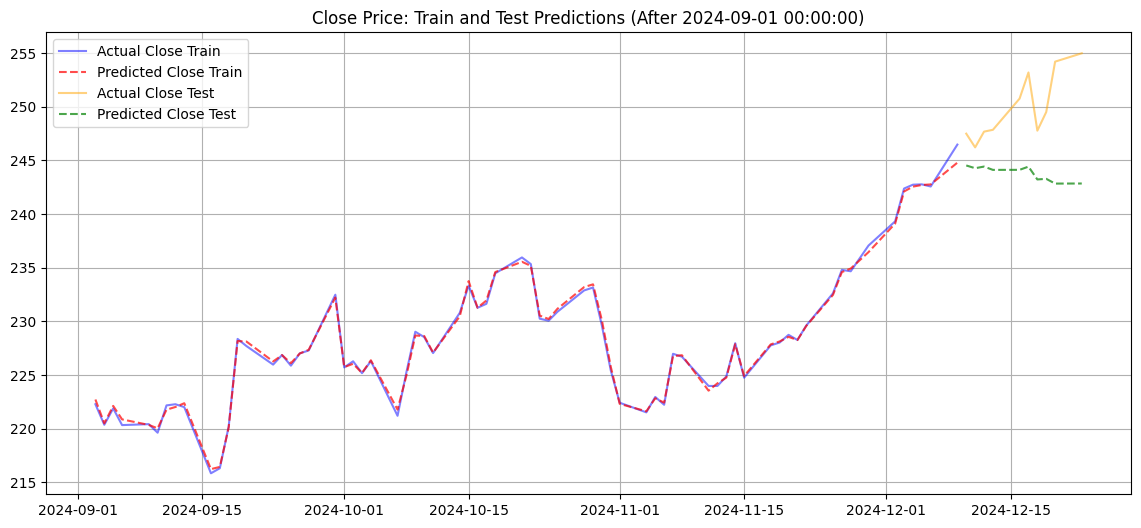

In [17]:
# ==========================================================
# 7.5 Plots for Deep Interpretation
# ==========================================================

# --- 1. Close Price Actual vs Predicted (Train and Test) ---

# First, make sure y_train and y_test have proper datetime index
# Bring the original index from X_train and X_test

y_train.index = X_train.index
y_test.index = X_test.index

# Define your time cutoff properly
time_index_filter = pd.to_datetime('2024-09-01')

# Correct filtering after fixing index
y_train_filtered = y_train.loc[y_train.index > time_index_filter]
y_pred_close_train_filtered = pd.Series(y_pred_close_train, index=y_train.index).loc[y_train.index > time_index_filter]

y_test_filtered = y_test.loc[y_test.index > time_index_filter]
y_pred_close_test_filtered = pd.Series(y_pred_close_test, index=y_test.index).loc[y_test.index > time_index_filter]

# --- Plot ---
plt.figure(figsize=(14,6))

plt.plot(y_train_filtered.index, y_train_filtered, label='Actual Close Train', color='blue', alpha=0.5)
plt.plot(y_train_filtered.index, y_pred_close_train_filtered, label='Predicted Close Train', color='red', linestyle='--', alpha=0.7)

plt.plot(y_test_filtered.index, y_test_filtered, label='Actual Close Test', color='orange', alpha=0.5)
plt.plot(y_test_filtered.index, y_pred_close_test_filtered, label='Predicted Close Test', color='green', linestyle='--', alpha=0.7)

plt.title(f'Close Price: Train and Test Predictions (After {time_index_filter})')
plt.legend()
plt.grid(True)
plt.show()

# ==========================================================
# 🚀 Done: Full ML Model Evaluation Train vs Test
# ==========================================================

/var/folders/sg/6fn_sqtx2q9b2k4xrpxrcf180000gn/T/ipykernel_89016/1004818882.py:53: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/Users/payamoghtanem/bootcamp/capstone-SignalSigma/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


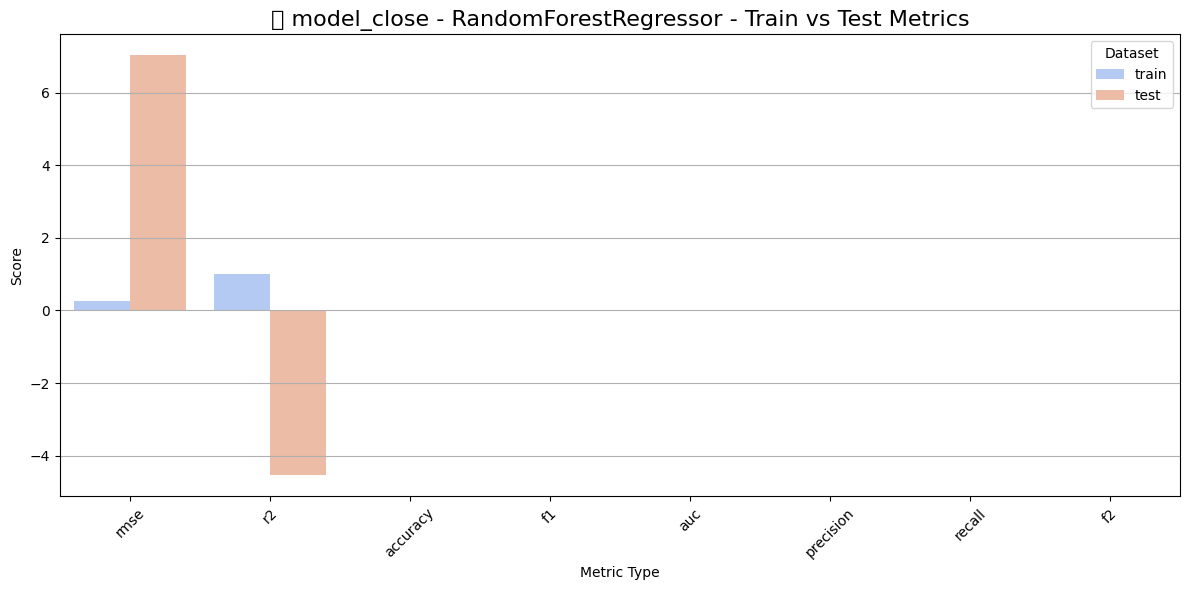

/var/folders/sg/6fn_sqtx2q9b2k4xrpxrcf180000gn/T/ipykernel_89016/1004818882.py:53: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/Users/payamoghtanem/bootcamp/capstone-SignalSigma/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


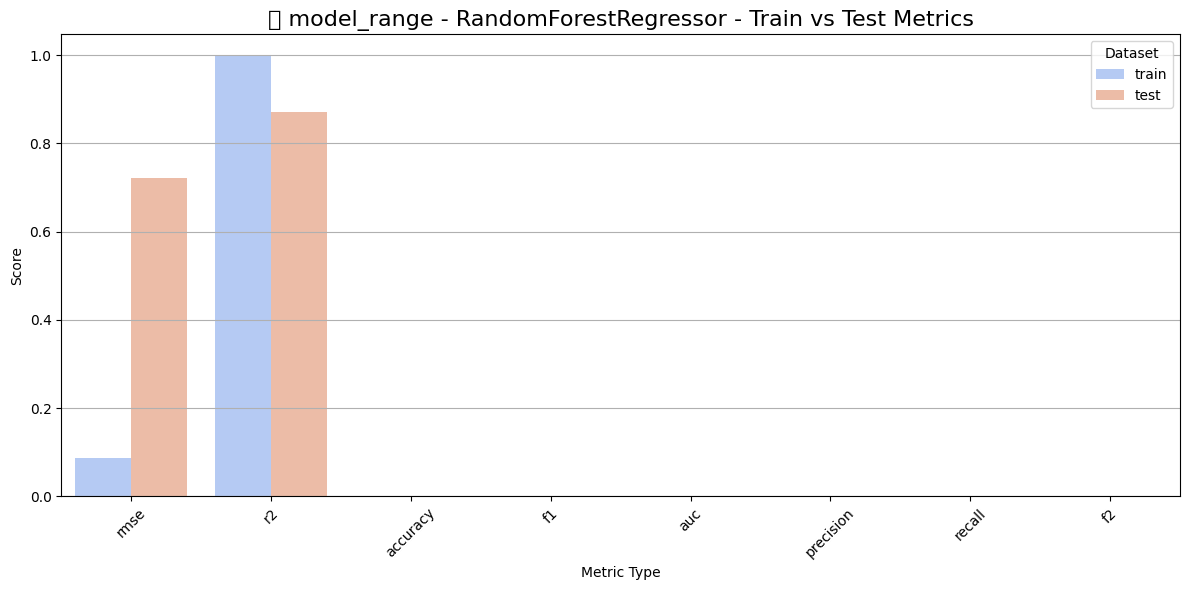

/var/folders/sg/6fn_sqtx2q9b2k4xrpxrcf180000gn/T/ipykernel_89016/1004818882.py:53: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/Users/payamoghtanem/bootcamp/capstone-SignalSigma/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


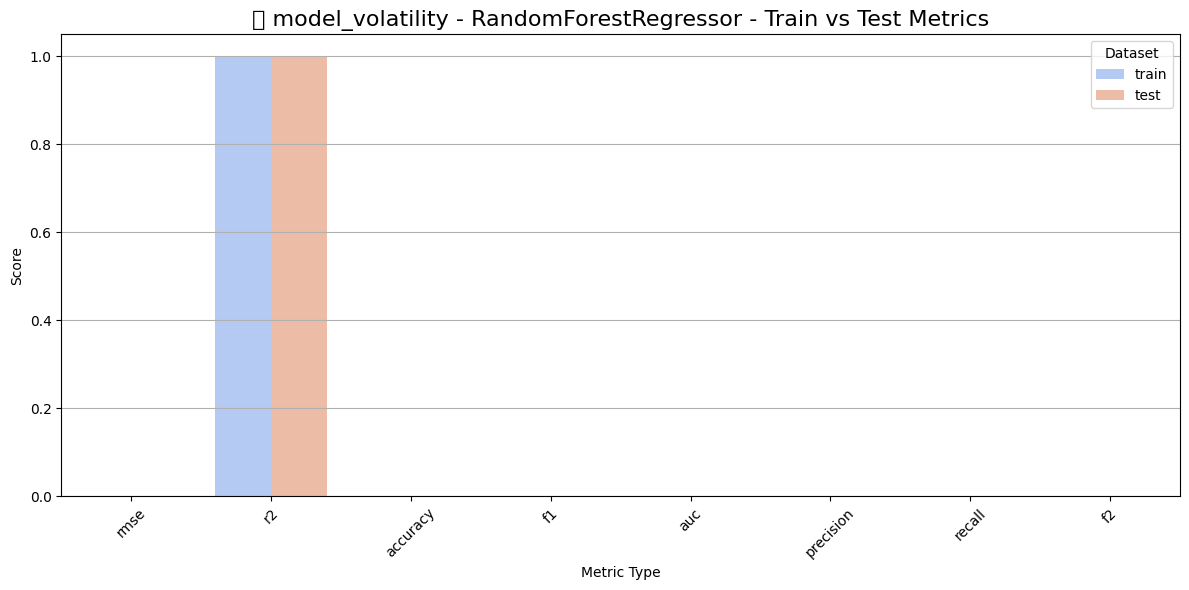

/var/folders/sg/6fn_sqtx2q9b2k4xrpxrcf180000gn/T/ipykernel_89016/1004818882.py:53: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/Users/payamoghtanem/bootcamp/capstone-SignalSigma/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


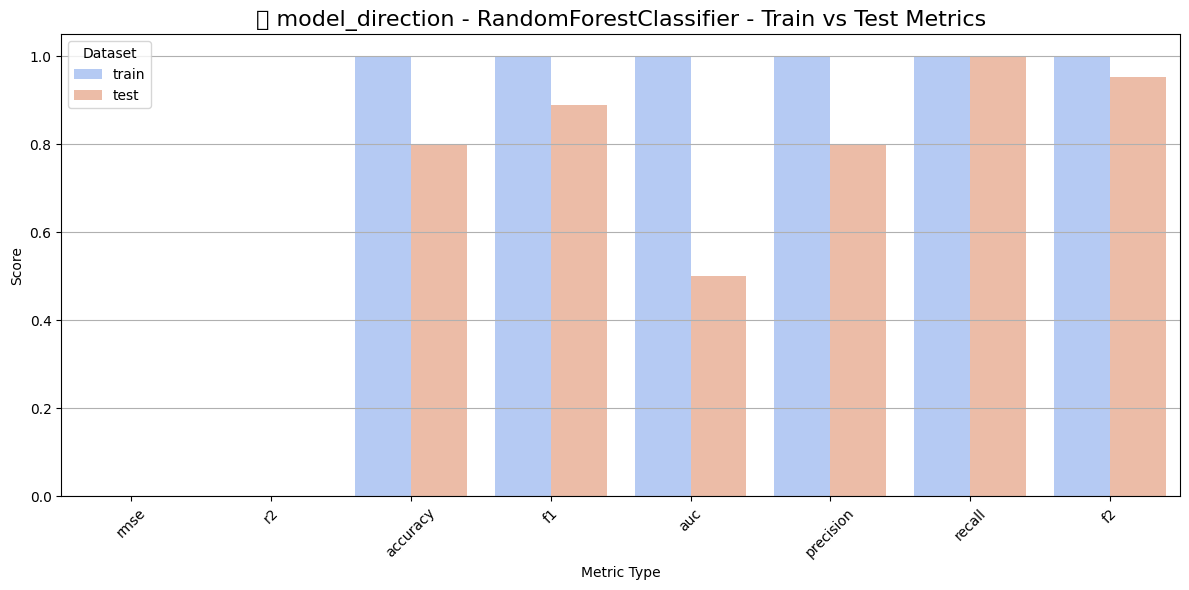

In [13]:
# ==========================================================
# 📋 7.4 Full Evaluation Summary (Updated for Extra Classification Metrics)
# ==========================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Convert List of Model Results into a Full DataFrame ---

# If you have multiple model results (as a list of dicts):
results_df = pd.DataFrame(model_results)

# --- 2. Melt to Long Format for Easier Processing ---

results_long = results_df.melt(id_vars=['model'], var_name='Metric', value_name='Score')

# --- 3. Split Metric into parts (target/metric/set) ---

results_long[['Target', 'Metric_Type', 'Set']] = results_long['Metric'].str.rsplit('_', n=2, expand=True)

# Clean ordering
results_long = results_long[['model', 'Target', 'Metric_Type', 'Set', 'Score']]

# --- 4. Pivot Table for Clean View (optional) ---

pivot_table = results_long.pivot_table(index=['model', 'Target', 'Metric_Type'], columns='Set', values='Score')
display(pivot_table.style.format("{:.4f}"))

# --- 5. Plotting Per Model ---

models = results_long['model'].unique()

for model_name in models:
    model_data = results_long[results_long['model'] == model_name]
    
    plt.figure(figsize=(12, 6))
    
    sns.barplot(
        data=model_data,
        x='Metric_Type',
        y='Score',
        hue='Set',
        palette='coolwarm'
    )
    
    plt.title(f"📊 {model_name} - Train vs Test Metrics", fontsize=16)
    plt.ylabel('Score')
    plt.xlabel('Metric Type')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.legend(title='Dataset')
    plt.tight_layout()
    plt.show()


# Advanced Prediction Evaluation Error and Residuals

# 📊 Advanced Prediction Evaluation

We visualize the model performance in multiple ways to better understand prediction behavior, model bias, uncertainty, and reliability.

---

## 1. Residuals vs Fitted Values

- **Purpose**: Check if prediction errors are random.
- **Interpretation**:
  - ✅ Random scatter around 0 → Model is likely well-specified.
  - ❌ Visible patterns → Model might be biased or missing features.
- **Goal**: No visible structure in residuals!

---

## 2. Prediction Error Distribution (Histogram)

- **Purpose**: Analyze how errors are distributed.
- **Interpretation**:
  - ✅ Bell-shaped (normal) distribution centered at 0 → Healthy model.
  - ❌ Skewed or fat-tailed → Model risk or data issues.
- **Goal**: Errors are centered and symmetrically spread around 0.

---

## 3. Predicted vs Actual Scatter Plot

- **Purpose**: See how predictions match true values.
- **Interpretation**:
  - ✅ Points lie close to the diagonal line → Accurate model.
  - ❌ Wide scatter → Model struggling to predict correctly.
- **Goal**: Tight clustering along the ideal line.

---

## 4. Prediction Uncertainty Bands

- **Purpose**: Visualize confidence intervals around predictions.
- **Interpretation**:
  - ✅ Most actual points inside ±1 Standard Deviation band → Reliable uncertainty estimate.
  - ❌ Many points outside → Unstable predictions or high risk.
- **Goal**: Small bands and most points inside.

---

# 🧠 Summary

| Check | Good Sign | Warning Sign |
|:---|:---|:---|
| Residuals | Random scatter around 0 | Patterns or trends |
| Error Histogram | Bell-shaped around 0 | Skewness or heavy tails |
| Prediction Scatter | Tight to diagonal | Wide spread |
| Prediction Band | Tight bands | Wide bands or many escapes |

---

> ✅ Good behavior in all plots increases confidence in your ML model performance!

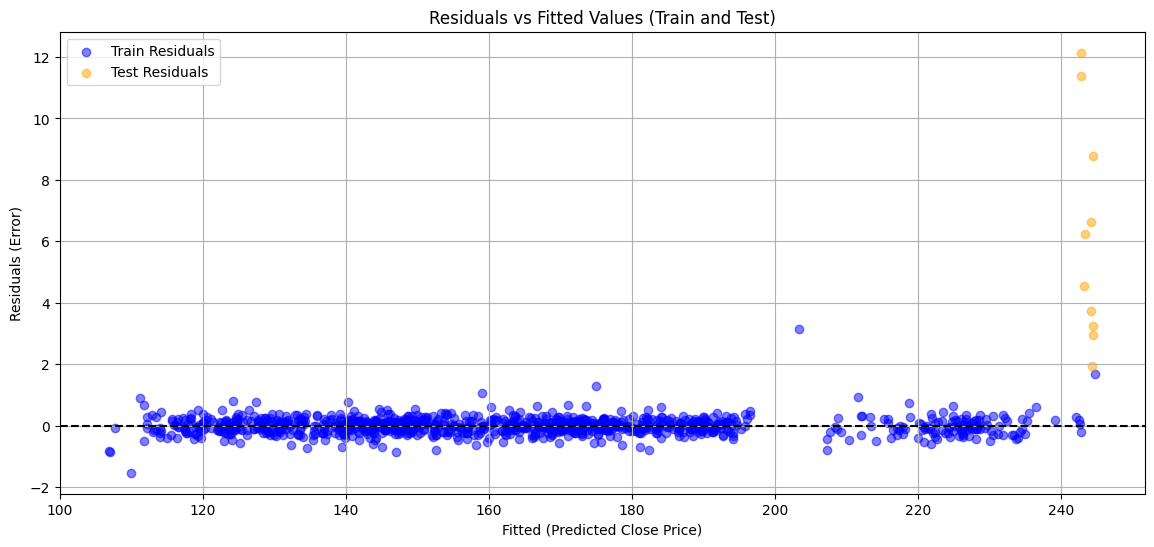

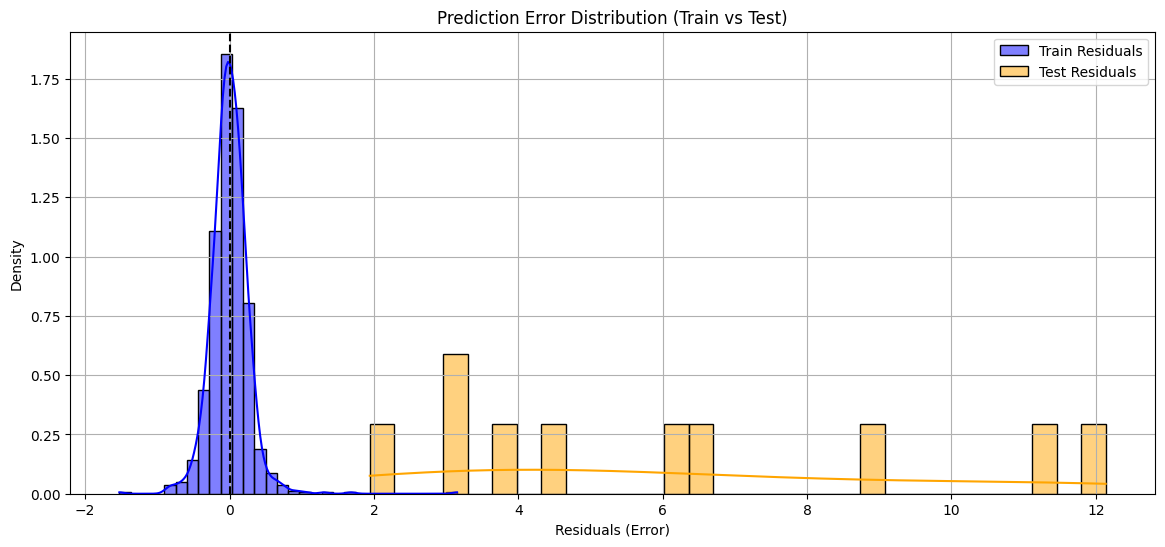

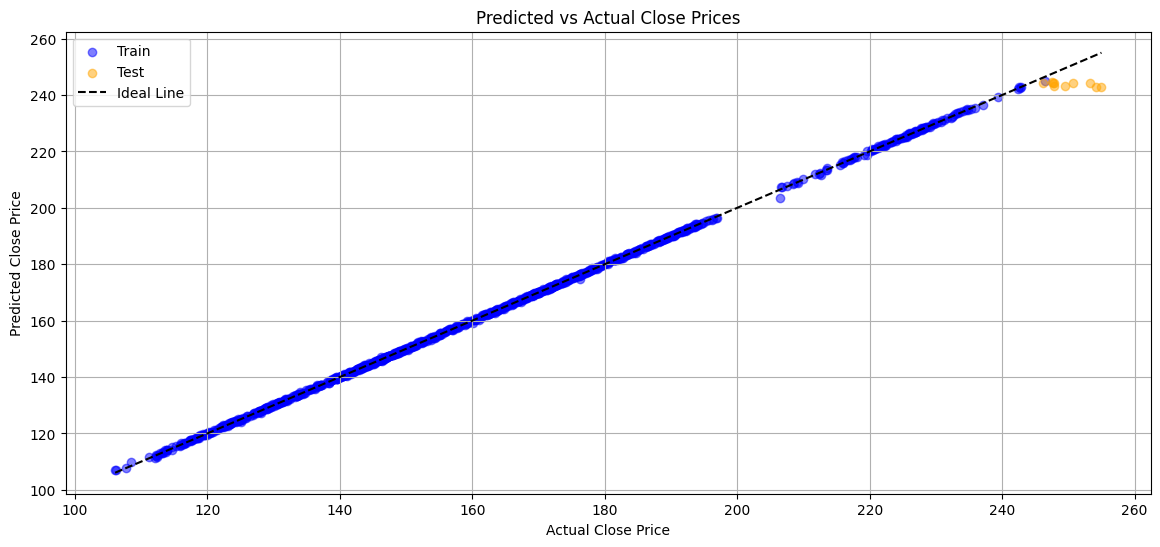

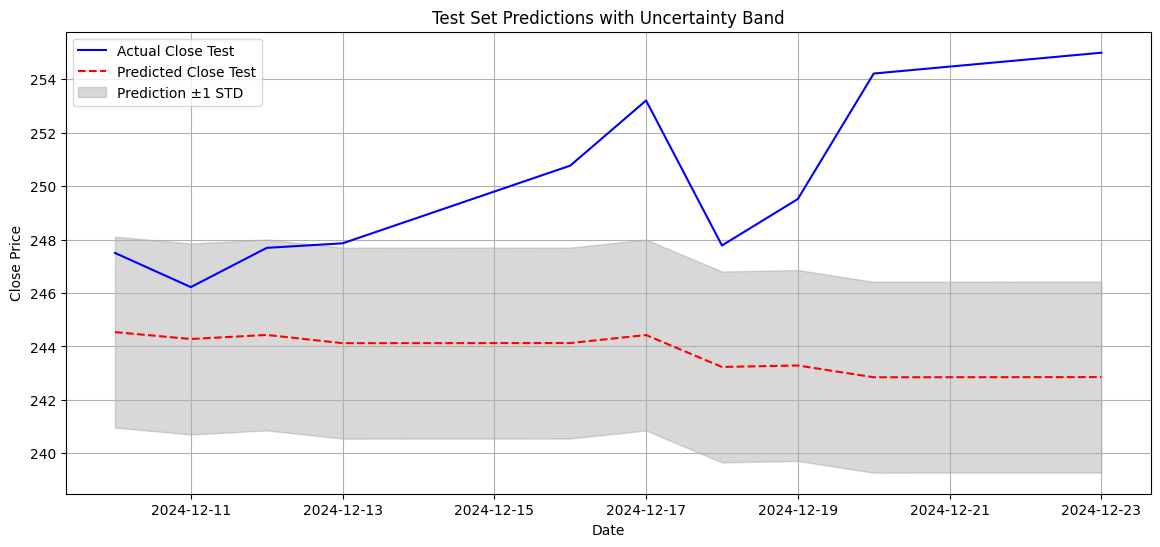

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Make sure index is restored for train and test predictions ---
y_train.index = X_train.index
y_test.index = X_test.index

# --- Create Prediction Series aligned ---
y_pred_close_train_series = pd.Series(y_pred_close_train, index=y_train.index)
y_pred_close_test_series = pd.Series(y_pred_close_test, index=y_test.index)

# --- Calculate Residuals (errors) ---
train_residuals = y_train - y_pred_close_train_series
test_residuals = y_test - y_pred_close_test_series

# ==========================================================
# 1. Residuals vs Fitted Plot
# ==========================================================

plt.figure(figsize=(14,6))
plt.scatter(y_pred_close_train_series, train_residuals, color='blue', label='Train Residuals', alpha=0.5)
plt.scatter(y_pred_close_test_series, test_residuals, color='orange', label='Test Residuals', alpha=0.5)
plt.axhline(0, linestyle='--', color='black')
plt.title('Residuals vs Fitted Values (Train and Test)')
plt.xlabel('Fitted (Predicted Close Price)')
plt.ylabel('Residuals (Error)')
plt.legend()
plt.grid(True)
plt.show()

# ➡️ Purpose: if model is good, residuals should be randomly scattered around zero.

# ==========================================================
# 2. Prediction Error Histogram
# ==========================================================

plt.figure(figsize=(14,6))
sns.histplot(train_residuals, color='blue', label='Train Residuals', kde=True, stat="density", bins=30)
sns.histplot(test_residuals, color='orange', label='Test Residuals', kde=True, stat="density", bins=30)
plt.axvline(0, linestyle='--', color='black')
plt.title('Prediction Error Distribution (Train vs Test)')
plt.xlabel('Residuals (Error)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# ➡️ Purpose: Check if errors are normally distributed (good sign!).

# ==========================================================
# 3. Predicted vs Actual Scatter Plot
# ==========================================================

plt.figure(figsize=(14,6))
plt.scatter(y_train, y_pred_close_train_series, color='blue', label='Train', alpha=0.5)
plt.scatter(y_test, y_pred_close_test_series, color='orange', label='Test', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='black', linestyle='--', label='Ideal Line')
plt.title('Predicted vs Actual Close Prices')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.legend()
plt.grid(True)
plt.show()

# ➡️ Purpose: Points close to diagonal means better model.

# ==========================================================
# 4. Optional: Prediction Uncertainty Bands (Simple Version)
# ==========================================================

# Only approximate basic bands (not full Bayesian confidence)

plt.figure(figsize=(14,6))
plt.plot(y_test.index, y_test, label='Actual Close Test', color='blue')
plt.plot(y_test.index, y_pred_close_test_series, label='Predicted Close Test', color='red', linestyle='--')
# Fake simple "uncertainty" bands (+/- 1 standard deviation of test residuals)
std_test_residual = test_residuals.std()
plt.fill_between(y_test.index, y_pred_close_test_series - std_test_residual, y_pred_close_test_series + std_test_residual, color='gray', alpha=0.3, label='Prediction ±1 STD')
plt.title('Test Set Predictions with Uncertainty Band')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

# ➡️ Purpose: See approximate model uncertainty visually (larger bands = lower confidence).



## 🔥 Feature Importance Analysis

- **Native Feature Importance**: Based on how much each feature reduces node impurity in the Random Forest trees.
- **Permutation Importance**: Measures the performance drop when a feature's values are randomly shuffled, providing a model-agnostic view.
- This helps understand which features the model relies on the most for predicting stock price and volatility.

We visualize the **Top 20 Most Important Features** based on both methods.


Feature  Importance
50          resistance1    0.389695
49             support1    0.241880
48          pivot_point    0.191669
7             avg_price    0.020936
82                 vwap    0.014507
71              ema_14d    0.012703
67               ema_5d    0.012644
64               sma_3d    0.011475
55            fib_0_30d    0.011260
78  bollinger_upper_14d    0.010866
0                  high    0.010616
52          resistance2    0.009765
56        fib_0.236_30d    0.009634
68               sma_7d    0.009404
65               ema_3d    0.009357
66               sma_5d    0.005660
2                  open    0.003956
84         lag_close_1d    0.003951
58          fib_0.5_30d    0.003928
80  bollinger_upper_20d    0.003845

/var/folders/sg/6fn_sqtx2q9b2k4xrpxrcf180000gn/T/ipykernel_89016/3721960590.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df.head(30), x='Importance', y='Feature', palette='viridis')


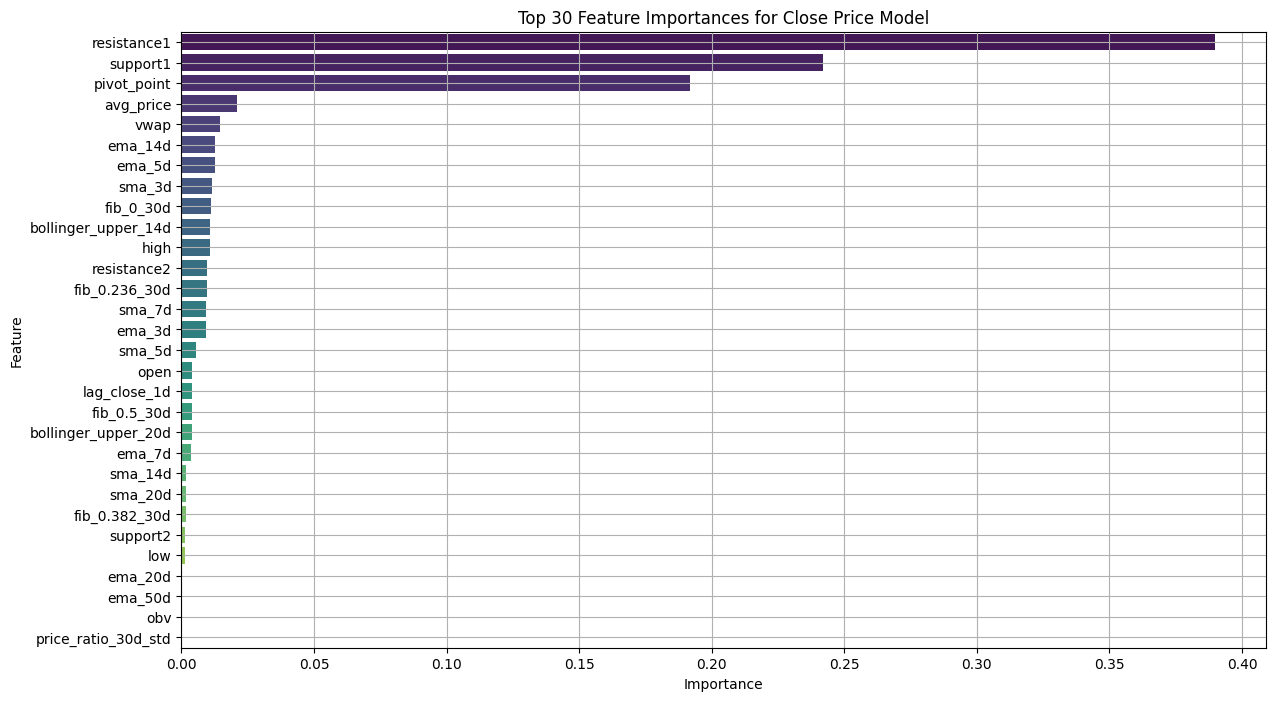

Feature  Permutation_Importance
37    volume_weighted_return_60d                0.024066
21           return_rollmean_60d                0.020928
28              momentum_rel_60d                0.006203
20                return_cum_60d                0.005950
27              momentum_abs_60d                0.005930
44                       atr_25d                0.004192
36    volume_weighted_return_30d                0.003247
93                lag_return_30d                0.003022
94     target_volatility_next_3d                0.002284
95     target_volatility_next_5d                0.000700
18                return_cum_30d                0.000504
15  volatility_return_log_5d_std                0.000123
59                 fib_0.618_30d                0.000000
55                     fib_0_30d                0.000000
54              donchian_low_20d                0.000000
69                        ema_7d                0.000000
68                        sma_7d                0.000000
67                        ema_5d                0.000000
66                        sma_5d                0.000000
65                        ema_3d                0.000000

/var/folders/sg/6fn_sqtx2q9b2k4xrpxrcf180000gn/T/ipykernel_89016/3721960590.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=perm_df.head(30), x='Permutation_Importance', y='Feature', palette='rocket')


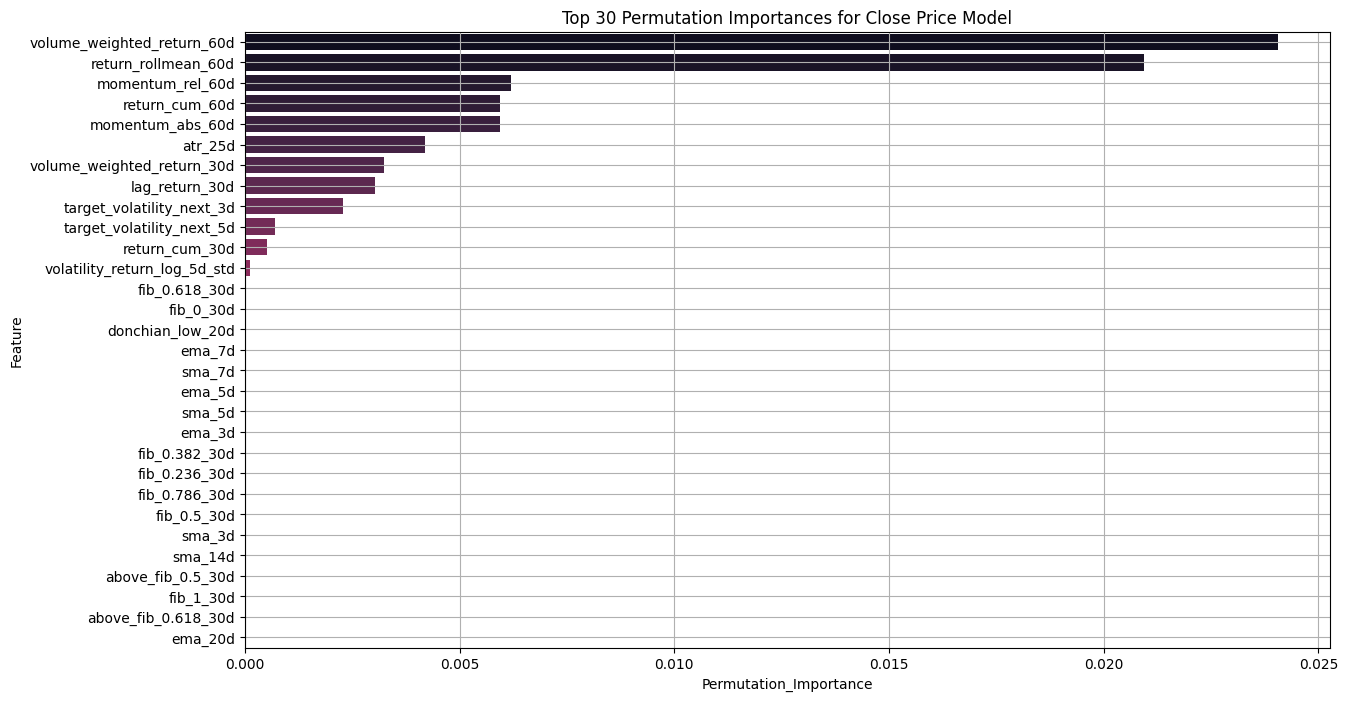

In [15]:
# ==========================================================
# 📦 8. Feature Importance Analysis (Random Forest Models)
# ==========================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance

# Make sure you have the feature names ready
feature_names = X_train.columns

# --- 8.1 Native Feature Importance (from Random Forest) ---

# Example for Close Price Model
importances = model_close.feature_importances_

# Create DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display
display(feature_importance_df.head(20))  # Top 20 important features

# --- 8.2 Plot Feature Importance ---

plt.figure(figsize=(14, 8))
sns.barplot(data=feature_importance_df.head(30), x='Importance', y='Feature', palette='viridis')
plt.title('Top 30 Feature Importances for Close Price Model')
plt.grid(True)
plt.show()

# --- 8.3 Bonus: Permutation Importance ---

perm_importance = permutation_importance(model_close, X_test_scaled, y_test, n_repeats=10, random_state=42)

perm_df = pd.DataFrame({
    'Feature': feature_names,
    'Permutation_Importance': perm_importance.importances_mean
}).sort_values(by='Permutation_Importance', ascending=False)

# Display
display(perm_df.head(20))

# --- Plot Permutation Importance ---

plt.figure(figsize=(14, 8))
sns.barplot(data=perm_df.head(30), x='Permutation_Importance', y='Feature', palette='rocket')
plt.title('Top 30 Permutation Importances for Close Price Model')
plt.grid(True)
plt.show()
